<a href="https://colab.research.google.com/github/IvanKatorgin/DS-in-medicine/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BC%D0%B5%D0%B4%D0%B8%D1%86%D0%B8%D0%BD%D1%81%D0%BA%D0%B8%D1%85_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%B8%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Итоговый проект по модулю "Анализ медицинских данных" курса DS в медицине. Каторгин И.П.

## Описание задания
Вам необходимо:
- провести разведывательный анализ данных, либо построить предиктивную модель;
- выявить причинно-следственную связь, закономерность в данных, попытаться выявить, что может оказывать влияние на каждую из метрик;
- выбрать Y и попытаться ответить на вопрос, что привело к изменениям этой метрики, или попытаться спрогнозировать эту метрику в перспективе 1 года.

In [235]:
# загрузим библиотеки
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, median_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

## Загрузим данные и проведем разведочный анализ данных

In [84]:
# загрузим данные
adv = pd.read_csv('adv_bad.csv', sep=';', parse_dates=True)
doctors = pd.read_csv('doctors_base_2021.csv', sep=';')
market = pd.read_csv('market_ls_16_20.csv', sep=';')
prescrip = pd.read_csv('prescriptions_16_20.csv', sep=';')
promo = pd.read_csv('promo_16_20.csv', sep=';')

In [3]:
adv.head()

,category1,category2,company,brand,date,region,adv_type,adv_type2,amount
0,БИОЛОГИЧЕСКИ АКТИВНЫЕ ДОБАВКИ (БАД),БИОЛОГИЧ. АКТИВ. ДОБ. ДЛЯ ПОХУДЕНИЯ (БАД),PHARMOCEAN LAB,ДОКТОР МОРЕ,01.12.2016,Country level,Magazine,advertising,131659
1,БИОЛОГИЧЕСКИ АКТИВНЫЕ ДОБАВКИ (БАД),БИОЛОГИЧ. АКТИВ. ДОБ. ДЛЯ ПОХУДЕНИЯ (БАД),PHARMOCEAN LAB,ДОКТОР МОРЕ,01.12.2016,Country level,Magazine,advertising,77849
2,БИОЛОГИЧЕСКИ АКТИВНЫЕ ДОБАВКИ (БАД),БИОЛОГИЧ. АКТИВ. ДОБ. ДЛЯ ПОХУДЕНИЯ (БАД),PHARMOCEAN LAB,ДОКТОР МОРЕ,01.07.2016,Country level,Magazine,advertising,37747
3,БИОЛОГИЧЕСКИ АКТИВНЫЕ ДОБАВКИ (БАД),БИОЛОГИЧ. АКТИВ. ДОБ. ДЛЯ ПОХУДЕНИЯ (БАД),PHARMOCEAN LAB,ДОКТОР МОРЕ,01.07.2016,Country level,Magazine,advertising,88595
4,БИОЛОГИЧЕСКИ АКТИВНЫЕ ДОБАВКИ (БАД),БИОЛОГИЧ. АКТИВ. ДОБ. ДЛЯ ПОХУДЕНИЯ (БАД),PHARMOCEAN LAB,ДОКТОР МОРЕ,01.06.2016,Country level,Magazine,advertising,252171


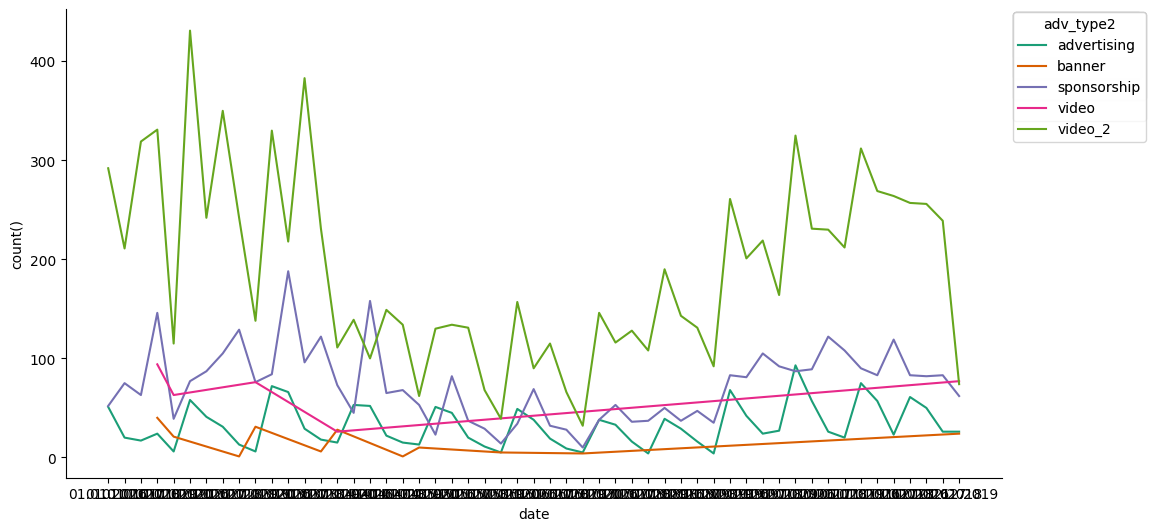

In [4]:
# @title date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = adv.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('adv_type2')):
  _plot_series(series, series_name, i)
  fig.legend(title='adv_type2', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
plt.savefig('date vs count')
_ = plt.ylabel('count()')

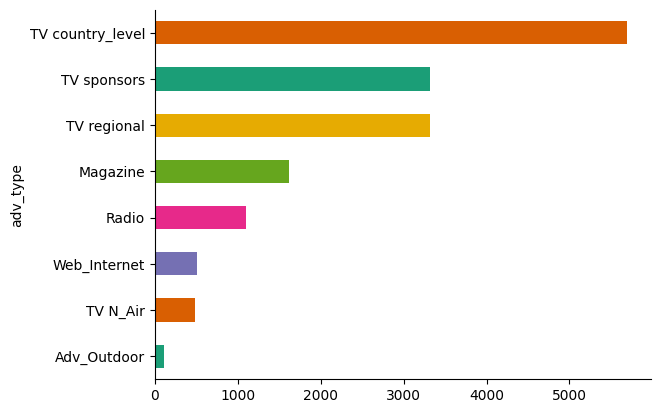

In [5]:
# @title adv_type

from matplotlib import pyplot as plt
import seaborn as sns
adv.groupby('adv_type').size().sort_values(ascending=True).plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('adv_type')

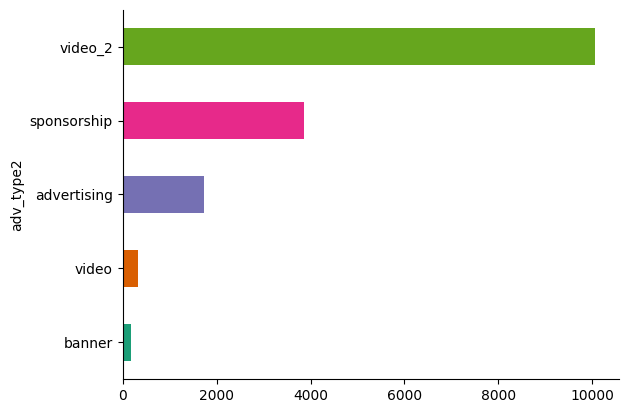

In [6]:
# @title adv_type2

from matplotlib import pyplot as plt
import seaborn as sns
adv.groupby('adv_type2').size().sort_values(ascending=True).plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('adv_type2')

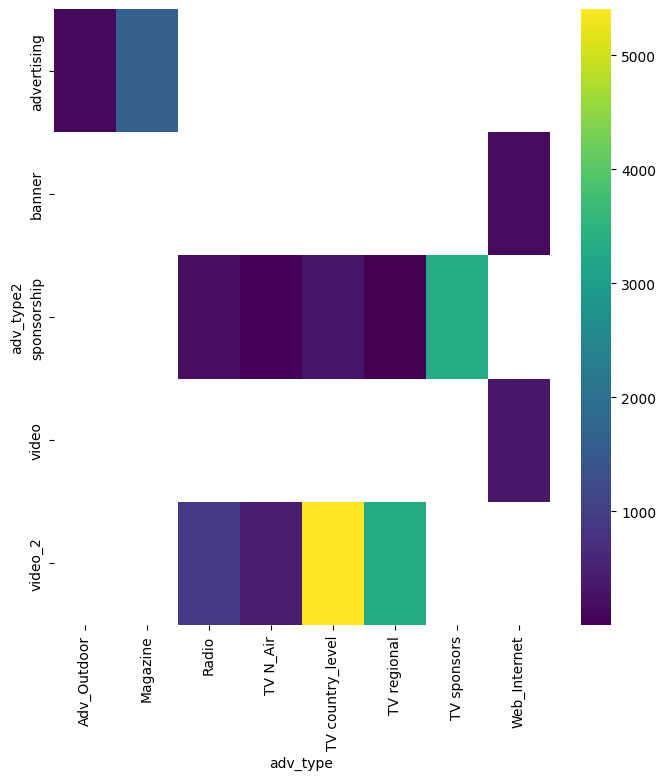

In [7]:
# @title adv_type vs adv_type2

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['adv_type2'].value_counts()
    for x_label, grp in adv.groupby('adv_type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('adv_type')
_ = plt.ylabel('adv_type2')

In [8]:
adv.describe()

,category1,category2,company,brand,date,region,adv_type,adv_type2,amount
count,16154,16154,16154,16154,16154,16154,16154,16154,16154
unique,82,109,79,156,53,33,8,5,14201
top,ИММУНОСТИМУЛИРУЮЩИЕ СРЕДСТВА,ИММУНОСТИМУЛИРУЮЩИЕ СРЕДСТВА (РАЗНОЕ),ФИРН М,ГРИППФЕРОН,01.01.2019,Country level,TV country_level,video_2,459
freq,4106,4096,2085,2085,635,11973,5698,10058,305


In [9]:
adv.shape

(16154, 9)

In [10]:
adv.isna().sum()

,0
category1,0
category2,0
company,0
brand,0
date,0
region,0
adv_type,0
adv_type2,0
amount,0


In [11]:
adv.dtypes

,0
category1,object
category2,object
company,object
brand,object
date,object
region,object
adv_type,object
adv_type2,object
amount,object


In [12]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16154 entries, 0 to 16153
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   category1  16154 non-null  object
 1   category2  16154 non-null  object
 2   company    16154 non-null  object
 3   brand      16154 non-null  object
 4   date       16154 non-null  object
 5   region     16154 non-null  object
 6   adv_type   16154 non-null  object
 7   adv_type2  16154 non-null  object
 8   amount     16154 non-null  object
dtypes: object(9)
memory usage: 1.1+ MB


In [13]:
adv.nunique()

,0
category1,82
category2,109
company,79
brand,156
date,53
region,33
adv_type,8
adv_type2,5
amount,14201


In [14]:
print(adv['date'].unique())

['01.12.2016' '01.07.2016' '01.06.2016' '01.05.2016' '01.03.2016'
 '01.11.2016' '01.02.2016' '01.01.2016' '01.08.2017' '01.04.2017'
 '01.07.2017' '01.06.2017' '01.05.2017' '01.03.2017' '01.10.2017'
 '01.02.2017' '01.01.2017' '01.07.2018' '01.01.2018' '01.12.2017'
 '01.08.2016' '01.04.2016' '01.10.2016' '01.09.2016' '01.11.2017'
 '01.09.2017' '01.08.2018' '01.04.2018' '01.05.2018' '01.03.2018'
 '01.11.2018' '01.10.2018' '01.09.2018' '01.02.2018' '01.12.2018'
 '01.06.2018' '01.01.2019' '01.08.2019' '01.04.2019' '01.07.2019'
 '01.06.2019' '01.05.2019' '01.03.2019' '01.10.2019' '01.09.2019'
 '01.02.2019' '01.12.2019' '01.03.2020' '01.02.2020' '01.01.2020'
 '01.04.2020' '01.06.2020' '01.05.2020']


In [15]:
doctors.head()

,type,country,area_old,admin_centre,city,specialty,specialisation,amount,area,date
0,дополнительная специальность,Азербайджан,Апшеронский,NaN,Хырдалан,Венерология,Венерология (поликлиника),3.0,NaN,01.01.2021
1,дополнительная специальность,Азербайджан,Баку,NaN,Амирджаны,Детская венерология,Детская венерология (стационар),1.0,NaN,01.01.2021
2,дополнительная специальность,Азербайджан,Баку,NaN,Бакиханов,Венерология,Венерология (поликлиника),2.0,NaN,01.01.2021
3,дополнительная специальность,Азербайджан,Баку,NaN,Баку,Акушерство и гинекология,Акушерство и гинекология (стационар),1.0,NaN,01.01.2021
4,дополнительная специальность,Азербайджан,Баку,NaN,Баку,Аллергология,Аллергология (стационар),1.0,NaN,01.01.2021


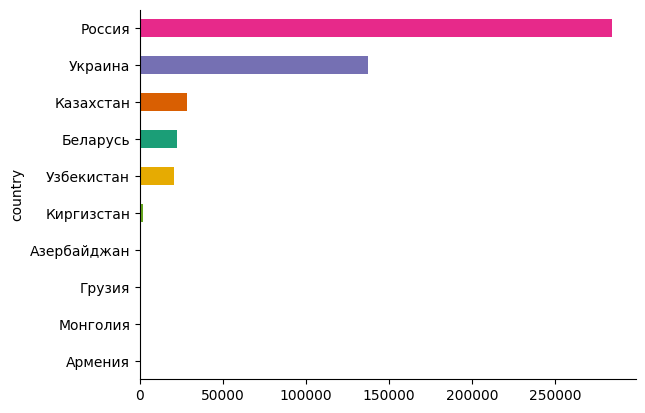

In [16]:
# @title country

from matplotlib import pyplot as plt
import seaborn as sns
doctors.groupby('country').size().sort_values(ascending=True).plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('country')

In [17]:
doctors.describe()

,amount
count,495627.000000
mean,7.714519
std,56.376277
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,6294.000000


In [18]:
doctors.shape

(495627, 10)

In [19]:
doctors.isna().sum()

,0
type,0
country,0
area_old,0
admin_centre,26679
city,0
specialty,0
specialisation,0
amount,0
area,211434
date,0


In [20]:
doctors.dtypes

,0
type,object
country,object
area_old,object
admin_centre,object
city,object
specialty,object
specialisation,object
amount,float64
area,object
date,object


In [21]:
doctors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495627 entries, 0 to 495626
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   type            495627 non-null  object 
 1   country         495627 non-null  object 
 2   area_old        495627 non-null  object 
 3   admin_centre    468948 non-null  object 
 4   city            495627 non-null  object 
 5   specialty       495627 non-null  object 
 6   specialisation  495627 non-null  object 
 7   amount          495627 non-null  float64
 8   area            284193 non-null  object 
 9   date            495627 non-null  object 
dtypes: float64(1), object(9)
memory usage: 37.8+ MB


In [22]:
doctors.nunique()

,0
type,2
country,10
area_old,161
admin_centre,139
city,9635
specialty,192
specialisation,549
amount,607
area,85
date,3


In [23]:
print(doctors['date'].unique())

['01.01.2021' '01.10.2021' '01.05.2021']


In [24]:
market.head()

,date,brand,Rx/OTC,sales_packs
0,01.09.2017,БАКЛОСАН,Rx,83890
1,01.03.2017,ЦЕФОПЕРАЗОН,Rx,537
2,01.04.2019,ФИТОФРОН,OTC,17562
3,01.02.2016,ИВЕПРЕД,Rx,360
4,01.10.2017,ПАНТЕНОЛ,OTC,52088


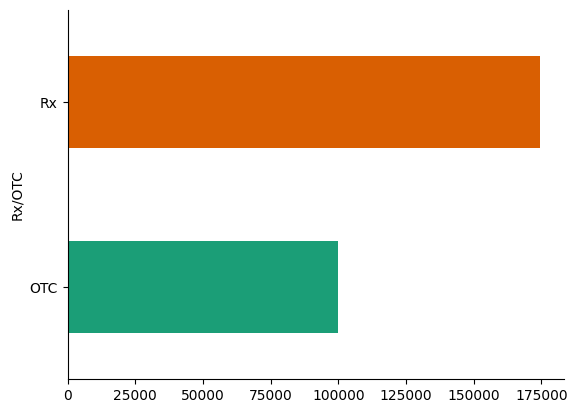

In [25]:
# @title Rx/OTC

from matplotlib import pyplot as plt
import seaborn as sns
market.groupby('Rx/OTC').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('Rx-OTC')

In [26]:
market.describe()

,sales_packs
count,2.744820e+05
mean,8.807698e+04
std,3.442364e+05
min,3.590000e+02
25%,5.810000e+02
50%,5.470500e+03
75%,4.019400e+04
max,1.431310e+07


In [27]:
market.shape

(274482, 4)

In [28]:
market.isna().sum()

,0
date,0
brand,0
Rx/OTC,0
sales_packs,0


In [29]:
market.dtypes

,0
date,object
brand,object
Rx/OTC,object
sales_packs,int64


In [30]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274482 entries, 0 to 274481
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   date         274482 non-null  object
 1   brand        274482 non-null  object
 2   Rx/OTC       274482 non-null  object
 3   sales_packs  274482 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 8.4+ MB


In [31]:
market.nunique()

,0
date,60
brand,6857
Rx/OTC,2
sales_packs,93425


In [32]:
print(market['date'].unique())

['01.09.2017' '01.03.2017' '01.04.2019' '01.02.2016' '01.10.2017'
 '01.07.2020' '01.06.2016' '01.02.2017' '01.05.2019' '01.11.2019'
 '01.09.2018' '01.04.2016' '01.05.2020' '01.06.2020' '01.10.2016'
 '01.11.2018' '01.05.2016' '01.04.2017' '01.12.2016' '01.10.2020'
 '01.06.2017' '01.10.2018' '01.06.2019' '01.06.2018' '01.04.2020'
 '01.12.2017' '01.08.2019' '01.05.2017' '01.05.2018' '01.03.2016'
 '01.08.2016' '01.01.2019' '01.11.2020' '01.02.2020' '01.02.2018'
 '01.11.2017' '01.07.2017' '01.01.2018' '01.07.2018' '01.01.2020'
 '01.03.2019' '01.09.2019' '01.10.2019' '01.07.2016' '01.12.2018'
 '01.08.2017' '01.01.2017' '01.09.2016' '01.02.2019' '01.03.2018'
 '01.07.2019' '01.12.2019' '01.03.2020' '01.08.2018' '01.09.2020'
 '01.04.2018' '01.11.2016' '01.01.2016' '01.12.2020' '01.08.2020']


In [33]:
prescrip.head()

,date,brand,specialty,rx_otc,mnn,atc1_name,amount
0,01.01.2016,5-НОК,pediatr,Rx,НИТРОКСОЛИН,J ПРОТИВОМИКРОБНЫЕ СРЕДСТВА ДЛЯ СИСТЕМНОГО ПРИ...,509
1,01.01.2016,5-НОК,terapevt_vop,Rx,НИТРОКСОЛИН,J ПРОТИВОМИКРОБНЫЕ СРЕДСТВА ДЛЯ СИСТЕМНОГО ПРИ...,545
2,01.01.2016,5-НОК,urolog,Rx,НИТРОКСОЛИН,J ПРОТИВОМИКРОБНЫЕ СРЕДСТВА ДЛЯ СИСТЕМНОГО ПРИ...,8548
3,01.01.2016,5-ФТОРУРАЦИЛ,terapevt_vop,Rx,ФЛУОРОУРАЦИЛ,L АНТИНЕОПЛАСТИЧЕСКИЕ И ИММУНОМОДУЛИРУЮЩИЕ СРЕ...,532
4,01.01.2016,L-АСПАРАГИНАЗА,allergolor_pulmonolog,Rx,АСПАРАГИНАЗА*,L АНТИНЕОПЛАСТИЧЕСКИЕ И ИММУНОМОДУЛИРУЮЩИЕ СРЕ...,493


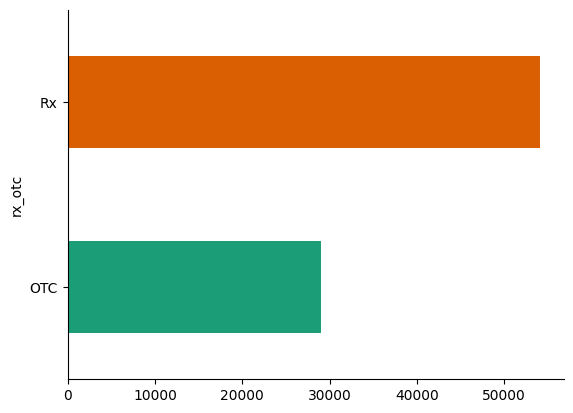

In [34]:
# @title Rx/OTC

from matplotlib import pyplot as plt
import seaborn as sns
prescrip.groupby('rx_otc').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('Rx-OTC-1')

In [35]:
prescrip.describe()

,amount
count,1.051960e+05
mean,1.577530e+04
std,5.024065e+04
min,4.780000e+02
25%,5.320000e+02
50%,1.475000e+03
75%,9.111000e+03
max,1.434878e+06


In [36]:
prescrip.shape

(105196, 7)

In [37]:
prescrip.isna().sum()

,0
date,0
brand,0
specialty,0
rx_otc,22017
mnn,0
atc1_name,18
amount,0


In [38]:
prescrip.dtypes

,0
date,object
brand,object
specialty,object
rx_otc,object
mnn,object
atc1_name,object
amount,int64


In [39]:
prescrip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105196 entries, 0 to 105195
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       105196 non-null  object
 1   brand      105196 non-null  object
 2   specialty  105196 non-null  object
 3   rx_otc     83179 non-null   object
 4   mnn        105196 non-null  object
 5   atc1_name  105178 non-null  object
 6   amount     105196 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 5.6+ MB


In [40]:
prescrip.nunique()

,0
date,19
brand,5107
specialty,8
rx_otc,2
mnn,1720
atc1_name,15
amount,29050


In [41]:
print(prescrip['date'].unique())

['01.01.2016' '01.04.2016' '01.07.2016' '01.10.2016' '01.01.2017'
 '01.04.2017' '01.07.2017' '01.10.2017' '01.01.2018' '01.04.2018'
 '01.07.2018' '01.10.2018' '01.01.2019' '01.04.2019' '01.07.2019'
 '01.10.2019' '01.01.2020' '01.04.2020' '01.07.2020']


In [42]:
print(prescrip['specialty'].unique())

['pediatr' 'terapevt_vop' 'urolog' 'allergolor_pulmonolog' 'neurolog'
 'gastroentorolog' 'endokrinolog' 'otolaringolog']


In [43]:
promo.head()

,date,brand,promotion,speciality,rx_otc,mnn,atc1_name,amount
0,01.01.2016,АЗИДРОП,reps_visits,otolaringolog,Rx,АЗИТРОМИЦИН,"S СРЕДСТВА, ДЕЙСТВУЮЩИЕ НА ОРГАНЫ ЧУВСТВ",115
1,01.01.2016,АЗИМИЦИН,reps_visits,terapevt_vop,Rx,АЗИТРОМИЦИН,J ПРОТИВОМИКРОБНЫЕ СРЕДСТВА ДЛЯ СИСТЕМНОГО ПРИ...,115
2,01.01.2016,АЗИТРОМИЦИН ЗЕНТ,reps_visits,otolaringolog,Rx,АЗИТРОМИЦИН,J ПРОТИВОМИКРОБНЫЕ СРЕДСТВА ДЛЯ СИСТЕМНОГО ПРИ...,115
3,01.01.2016,АЗИТРОМИЦИН ЗЕНТ,reps_visits,pharmacist,Rx,АЗИТРОМИЦИН,J ПРОТИВОМИКРОБНЫЕ СРЕДСТВА ДЛЯ СИСТЕМНОГО ПРИ...,115
4,01.01.2016,АКТОВЕГИН,reps_visits,neurolog,OTC,-,D ДЕРМАТОЛОГИЧЕСКИЕ СРЕДСТВА,115


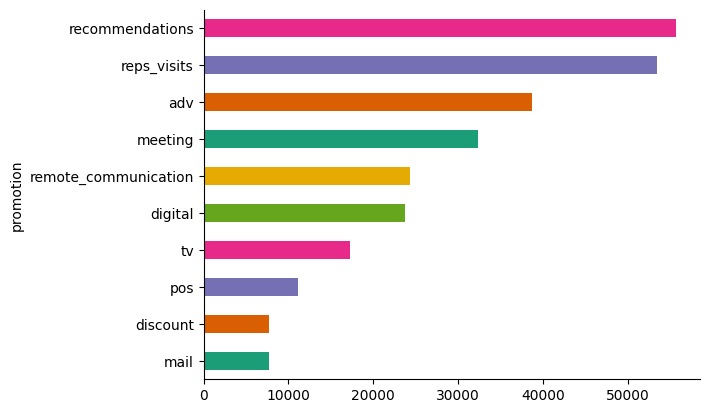

In [44]:
# @title promotion

from matplotlib import pyplot as plt
import seaborn as sns
promo.groupby('promotion').size().sort_values(ascending=True).plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('promotion')

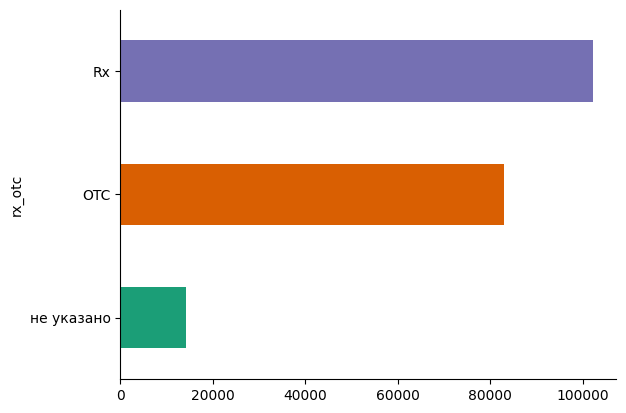

In [45]:
# @title Rx/OTC

from matplotlib import pyplot as plt
import seaborn as sns
promo.groupby('rx_otc').size().sort_values(ascending = True).plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('Rx-OTC-2')

In [46]:
promo.describe()

,amount
count,272200.000000
mean,554.696767
std,1090.346693
min,115.000000
25%,134.000000
50%,242.000000
75%,510.000000
max,53439.000000


In [47]:
promo.shape

(272200, 8)

In [48]:
promo.isna().sum()

,0
date,0
brand,0
promotion,0
speciality,0
rx_otc,72899
mnn,0
atc1_name,957
amount,0


In [49]:
promo.dtypes

,0
date,object
brand,object
promotion,object
speciality,object
rx_otc,object
mnn,object
atc1_name,object
amount,int64


In [50]:
promo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272200 entries, 0 to 272199
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        272200 non-null  object
 1   brand       272200 non-null  object
 2   promotion   272200 non-null  object
 3   speciality  272200 non-null  object
 4   rx_otc      199301 non-null  object
 5   mnn         272200 non-null  object
 6   atc1_name   271243 non-null  object
 7   amount      272200 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


In [51]:
promo.nunique()

,0
date,19
brand,4849
promotion,10
speciality,10
rx_otc,3
mnn,1747
atc1_name,14
amount,6546


In [52]:
print(promo['date'].unique())

['01.01.2016' '01.04.2016' '01.07.2016' '01.10.2016' '01.01.2017'
 '01.04.2017' '01.07.2017' '01.10.2017' '01.01.2018' '01.04.2018'
 '01.07.2018' '01.10.2018' '01.01.2019' '01.04.2019' '01.07.2019'
 '01.10.2019' '01.07.2020' '01.01.2020' '01.04.2020']


In [53]:
print(promo['speciality'].unique())

['otolaringolog' 'terapevt_vop' 'pharmacist' 'neurolog' 'gastroentorolog'
 'urolog' 'allergolor_pulmonolog' 'pediatr' 'endokrinolog' 'khirurg']


In [54]:
print(prescrip['specialty'].unique())

['pediatr' 'terapevt_vop' 'urolog' 'allergolor_pulmonolog' 'neurolog'
 'gastroentorolog' 'endokrinolog' 'otolaringolog']


Предварительные выводы:
1. Таблицу с докторами нельзя никак привязать к остальным таблицам и для дальнейшего анализа она исключается
2. В таблицах нет уникальных id, что может сказаться на достоверности результатов
3. В таблицах имеются пропуски данных
4. Даты в таблицах врачебных назначений и промо активностей идут по квартально, а в таблицах с рекламой и продажами идут помесячно
5. Рецептурных препаратов (RX) продается больше, чем безрецептурных (ОТС)

Поскольку даты в таблицах врачебных назначений и промо активностей идут по квартально, а в таблицах с рекламой и продажами - помесячно, то приведем все даты к квартальным и преобразуем получившуюся строку в дату

In [55]:
# преобразуем дату в таблице adv
def date_adv(data):
    if data['date'] == '01.01.2016' or data['date'] == '01.02.2016' or data['date'] == '01.03.2016':
        return '2016-01-01'
    elif data['date'] == '01.04.2016' or data['date'] == '01.05.2016' or data['date'] == '01.06.2016':
        return '2016-04-01'
    elif data['date'] == '01.07.2016' or data['date'] == '01.08.2016' or data['date'] == '01.09.2016':
        return '2016-07-01'
    elif data['date'] == '01.10.2016' or data['date'] == '01.11.2016' or data['date'] == '01.12.2016':
        return '2016-10-01'
    elif data['date'] == '01.01.2017' or data['date'] == '01.02.2017' or data['date'] == '01.03.2017':
        return '2017-01-01'
    elif data['date'] == '01.04.2017' or data['date'] == '01.05.2017' or data['date'] == '01.06.2017':
        return '2017-04-01'
    elif data['date'] == '01.07.2017' or data['date'] == '01.08.2017' or data['date'] == '01.09.2017':
        return '2017-07-01'
    elif data['date'] == '01.10.2017' or data['date'] == '01.11.2017' or data['date'] == '01.12.2017':
        return '2017-10-01'
    elif data['date'] == '01.01.2018' or data['date'] == '01.02.2018' or data['date'] == '01.03.2018':
        return '2018-01-01'
    elif data['date'] == '01.04.2018' or data['date'] == '01.05.2018' or data['date'] == '01.06.2018':
        return '2018-04-01'
    elif data['date'] == '01.07.2018' or data['date'] == '01.08.2018' or data['date'] == '01.09.2018':
        return '2018-07-01'
    elif data['date'] == '01.10.2018' or data['date'] == '01.11.2018' or data['date'] == '01.12.2018':
        return '2018-10-01'
    elif data['date'] == '01.01.2019' or data['date'] == '01.02.2019' or data['date'] == '01.03.2019':
        return '2019-01-01'
    elif data['date'] == '01.04.2019' or data['date'] == '01.05.2019' or data['date'] == '01.06.2019':
        return '2019-04-01'
    elif data['date'] == '01.07.2019' or data['date'] == '01.08.2019' or data['date'] == '01.09.2019':
        return '2019-07-01'
    elif data['date'] == '01.10.2019' or data['date'] == '01.11.2019' or data['date'] == '01.12.2019':
        return '2019-10-01'
    elif data['date'] == '01.01.2020' or data['date'] == '01.02.2020' or data['date'] == '01.03.2020':
        return '2020-01-01'
    elif data['date'] == '01.04.2020' or data['date'] == '01.05.2020' or data['date'] == '01.06.2020':
        return '2020-04-01'
    elif data['date'] == '01.07.2020' or data['date'] == '01.08.2020' or data['date'] == '01.09.2020':
        return '2020-07-01'
    elif data['date'] == '01.10.2020' or data['date'] == '01.11.2020' or data['date'] == '01.12.2020':
        return '2020-10-01'

adv['date_2'] = adv.apply(date_adv, axis=1)
adv['date_2'] = pd.to_datetime(adv['date_2'], format='%Y-%m-%d')
adv['adv_amount'] = pd.to_numeric(adv['amount'], errors='coerce')
adv_grp = adv.groupby('date_2').sum('adv_amount').sort_values(by='date_2')[['adv_amount']]
adv_grp

,adv_amount
date_2,
2016-01-01,2.557433e+09
2016-04-01,6.606662e+08
2016-07-01,1.379890e+09
2016-10-01,2.482576e+09
2017-01-01,2.446700e+09
2017-04-01,5.032623e+08
2017-07-01,1.133911e+09
2017-10-01,2.165803e+09
2018-01-01,2.432039e+09


In [56]:
# преобразуем дату в таблице market
def date_market(data):
    if data['date'] == '01.01.2016' or data['date'] == '01.02.2016' or data['date'] == '01.03.2016':
        return '2016-01-01'
    elif data['date'] == '01.04.2016' or data['date'] == '01.05.2016' or data['date'] == '01.06.2016':
        return '2016-04-01'
    elif data['date'] == '01.07.2016' or data['date'] == '01.08.2016' or data['date'] == '01.09.2016':
        return '2016-07-01'
    elif data['date'] == '01.10.2016' or data['date'] == '01.11.2016' or data['date'] == '01.12.2016':
        return '2016-10-01'
    elif data['date'] == '01.01.2017' or data['date'] == '01.02.2017' or data['date'] == '01.03.2017':
        return '2017-01-01'
    elif data['date'] == '01.04.2017' or data['date'] == '01.05.2017' or data['date'] == '01.06.2017':
        return '2017-04-01'
    elif data['date'] == '01.07.2017' or data['date'] == '01.08.2017' or data['date'] == '01.09.2017':
        return '2017-07-01'
    elif data['date'] == '01.10.2017' or data['date'] == '01.11.2017' or data['date'] == '01.12.2017':
        return '2017-10-01'
    elif data['date'] == '01.01.2018' or data['date'] == '01.02.2018' or data['date'] == '01.03.2018':
        return '2018-01-01'
    elif data['date'] == '01.04.2018' or data['date'] == '01.05.2018' or data['date'] == '01.06.2018':
        return '2018-04-01'
    elif data['date'] == '01.07.2018' or data['date'] == '01.08.2018' or data['date'] == '01.09.2018':
        return '2018-07-01'
    elif data['date'] == '01.10.2018' or data['date'] == '01.11.2018' or data['date'] == '01.12.2018':
        return '2018-10-01'
    elif data['date'] == '01.01.2019' or data['date'] == '01.02.2019' or data['date'] == '01.03.2019':
        return '2019-01-01'
    elif data['date'] == '01.04.2019' or data['date'] == '01.05.2019' or data['date'] == '01.06.2019':
        return '2019-04-01'
    elif data['date'] == '01.07.2019' or data['date'] == '01.08.2019' or data['date'] == '01.09.2019':
        return '2019-07-01'
    elif data['date'] == '01.10.2019' or data['date'] == '01.11.2019' or data['date'] == '01.12.2019':
        return '2019-10-01'
    elif data['date'] == '01.01.2020' or data['date'] == '01.02.2020' or data['date'] == '01.03.2020':
        return '2020-01-01'
    elif data['date'] == '01.04.2020' or data['date'] == '01.05.2020' or data['date'] == '01.06.2020':
        return '2020-04-01'
    elif data['date'] == '01.07.2020' or data['date'] == '01.08.2020' or data['date'] == '01.09.2020':
        return '2020-07-01'
    elif data['date'] == '01.10.2020' or data['date'] == '01.11.2020' or data['date'] == '01.12.2020':
        return '2020-10-01'

market['date_2'] = market.apply(date_market, axis=1)
market['date_2'] = pd.to_datetime(market['date_2'], format='%Y-%m-%d')
market['sales_packs'] = pd.to_numeric(market['sales_packs'], errors='coerce')
market_grp = market.groupby('date_2').sum('sales_packs').sort_values(by='date_2')[['sales_packs']]
market_grp

,sales_packs
date_2,
2016-01-01,1317762977
2016-04-01,1213515023
2016-07-01,1240190599
2016-10-01,1343344486
2017-01-01,1281845183
2017-04-01,1176765669
2017-07-01,1265974165
2017-10-01,1300857318
2018-01-01,1451196108


In [57]:
# преобразуем дату в таблице prescrip
def date_prescrip(data):
    if data['date'] == '01.01.2016' or data['date'] == '01.02.2016' or data['date'] == '01.03.2016':
        return '2016-01-01'
    elif data['date'] == '01.04.2016' or data['date'] == '01.05.2016' or data['date'] == '01.06.2016':
        return '2016-04-01'
    elif data['date'] == '01.07.2016' or data['date'] == '01.08.2016' or data['date'] == '01.09.2016':
        return '2016-07-01'
    elif data['date'] == '01.10.2016' or data['date'] == '01.11.2016' or data['date'] == '01.12.2016':
        return '2016-10-01'
    elif data['date'] == '01.01.2017' or data['date'] == '01.02.2017' or data['date'] == '01.03.2017':
        return '2017-01-01'
    elif data['date'] == '01.04.2017' or data['date'] == '01.05.2017' or data['date'] == '01.06.2017':
        return '2017-04-01'
    elif data['date'] == '01.07.2017' or data['date'] == '01.08.2017' or data['date'] == '01.09.2017':
        return '2017-07-01'
    elif data['date'] == '01.10.2017' or data['date'] == '01.11.2017' or data['date'] == '01.12.2017':
        return '2017-10-01'
    elif data['date'] == '01.01.2018' or data['date'] == '01.02.2018' or data['date'] == '01.03.2018':
        return '2018-01-01'
    elif data['date'] == '01.04.2018' or data['date'] == '01.05.2018' or data['date'] == '01.06.2018':
        return '2018-04-01'
    elif data['date'] == '01.07.2018' or data['date'] == '01.08.2018' or data['date'] == '01.09.2018':
        return '2018-07-01'
    elif data['date'] == '01.10.2018' or data['date'] == '01.11.2018' or data['date'] == '01.12.2018':
        return '2018-10-01'
    elif data['date'] == '01.01.2019' or data['date'] == '01.02.2019' or data['date'] == '01.03.2019':
        return '2019-01-01'
    elif data['date'] == '01.04.2019' or data['date'] == '01.05.2019' or data['date'] == '01.06.2019':
        return '2019-04-01'
    elif data['date'] == '01.07.2019' or data['date'] == '01.08.2019' or data['date'] == '01.09.2019':
        return '2019-07-01'
    elif data['date'] == '01.10.2019' or data['date'] == '01.11.2019' or data['date'] == '01.12.2019':
        return '2019-10-01'
    elif data['date'] == '01.01.2020' or data['date'] == '01.02.2020' or data['date'] == '01.03.2020':
        return '2020-01-01'
    elif data['date'] == '01.04.2020' or data['date'] == '01.05.2020' or data['date'] == '01.06.2020':
        return '2020-04-01'
    elif data['date'] == '01.07.2020' or data['date'] == '01.08.2020' or data['date'] == '01.09.2020':
        return '2020-07-01'
    elif data['date'] == '01.10.2020' or data['date'] == '01.11.2020' or data['date'] == '01.12.2020':
        return '2020-10-01'

prescrip['date_2'] = prescrip.apply(date_prescrip, axis=1)
prescrip['date_2'] = pd.to_datetime(prescrip['date_2'], format='%Y-%m-%d')
prescrip['prescrip_amount'] = pd.to_numeric(prescrip['amount'], errors='coerce')
prescrip_grp = prescrip.groupby('date_2').sum('prescrip_amount').sort_values(by='date_2')[['prescrip_amount']]
prescrip_grp

,prescrip_amount
date_2,
2016-01-01,107778271
2016-04-01,99716201
2016-07-01,96384220
2016-10-01,106099704
2017-01-01,104304141
2017-04-01,97625430
2017-07-01,93454507
2017-10-01,102533178
2018-01-01,94353988


In [58]:
# преобразуем дату в таблице promo
def date_promo(data):
    if data['date'] == '01.01.2016' or data['date'] == '01.02.2016' or data['date'] == '01.03.2016':
        return '2016-01-01'
    elif data['date'] == '01.04.2016' or data['date'] == '01.05.2016' or data['date'] == '01.06.2016':
        return '2016-04-01'
    elif data['date'] == '01.07.2016' or data['date'] == '01.08.2016' or data['date'] == '01.09.2016':
        return '2016-07-01'
    elif data['date'] == '01.10.2016' or data['date'] == '01.11.2016' or data['date'] == '01.12.2016':
        return '2016-10-01'
    elif data['date'] == '01.01.2017' or data['date'] == '01.02.2017' or data['date'] == '01.03.2017':
        return '2017-01-01'
    elif data['date'] == '01.04.2017' or data['date'] == '01.05.2017' or data['date'] == '01.06.2017':
        return '2017-04-01'
    elif data['date'] == '01.07.2017' or data['date'] == '01.08.2017' or data['date'] == '01.09.2017':
        return '2017-07-01'
    elif data['date'] == '01.10.2017' or data['date'] == '01.11.2017' or data['date'] == '01.12.2017':
        return '2017-10-01'
    elif data['date'] == '01.01.2018' or data['date'] == '01.02.2018' or data['date'] == '01.03.2018':
        return '2018-01-01'
    elif data['date'] == '01.04.2018' or data['date'] == '01.05.2018' or data['date'] == '01.06.2018':
        return '2018-04-01'
    elif data['date'] == '01.07.2018' or data['date'] == '01.08.2018' or data['date'] == '01.09.2018':
        return '2018-07-01'
    elif data['date'] == '01.10.2018' or data['date'] == '01.11.2018' or data['date'] == '01.12.2018':
        return '2018-10-01'
    elif data['date'] == '01.01.2019' or data['date'] == '01.02.2019' or data['date'] == '01.03.2019':
        return '2019-01-01'
    elif data['date'] == '01.04.2019' or data['date'] == '01.05.2019' or data['date'] == '01.06.2019':
        return '2019-04-01'
    elif data['date'] == '01.07.2019' or data['date'] == '01.08.2019' or data['date'] == '01.09.2019':
        return '2019-07-01'
    elif data['date'] == '01.10.2019' or data['date'] == '01.11.2019' or data['date'] == '01.12.2019':
        return '2019-10-01'
    elif data['date'] == '01.01.2020' or data['date'] == '01.02.2020' or data['date'] == '01.03.2020':
        return '2020-01-01'
    elif data['date'] == '01.04.2020' or data['date'] == '01.05.2020' or data['date'] == '01.06.2020':
        return '2020-04-01'
    elif data['date'] == '01.07.2020' or data['date'] == '01.08.2020' or data['date'] == '01.09.2020':
        return '2020-07-01'
    elif data['date'] == '01.10.2020' or data['date'] == '01.11.2020' or data['date'] == '01.12.2020':
        return '2020-10-01'

promo['date_2'] = promo.apply(date_promo, axis=1)
promo['date_2'] = pd.to_datetime(promo['date_2'], format='%Y-%m-%d')
promo['promo_amount'] = pd.to_numeric(promo['amount'], errors='coerce')
promo_grp = promo.groupby('date_2').sum('promo_amount').sort_values(by='date_2')[['promo_amount']]
promo_grp

,promo_amount
date_2,
2016-01-01,8683624
2016-04-01,8807428
2016-07-01,8134529
2016-10-01,8844989
2017-01-01,8787983
2017-04-01,8655246
2017-07-01,8265296
2017-10-01,8555506
2018-01-01,8258022


In [59]:
# собираем общий датафрейм по продажам, тв-рекламе, назначениям, промо активностям
data_grp = adv_grp.merge(market_grp, how='left', on='date_2').\
    merge(prescrip_grp, how='left', on='date_2').\
    merge(promo_grp, how='left', on='date_2')

data_grp = data_grp.reset_index()
data_grp

,date_2,adv_amount,sales_packs,prescrip_amount,promo_amount
0,2016-01-01,2.557433e+09,1317762977,107778271,8683624
1,2016-04-01,6.606662e+08,1213515023,99716201,8807428
2,2016-07-01,1.379890e+09,1240190599,96384220,8134529
3,2016-10-01,2.482576e+09,1343344486,106099704,8844989
4,2017-01-01,2.446700e+09,1281845183,104304141,8787983
5,2017-04-01,5.032623e+08,1176765669,97625430,8655246
6,2017-07-01,1.133911e+09,1265974165,93454507,8265296
7,2017-10-01,2.165803e+09,1300857318,102533178,8555506
8,2018-01-01,2.432039e+09,1451196108,94353988,8258022
9,2018-04-01,8.248164e+08,1102514291,68239499,6368560


In [60]:
data_grp.isna().sum()

,0
date_2,0
adv_amount,0
sales_packs,0
prescrip_amount,0
promo_amount,0


Пропусков нет. Можно работать с данными дальше

## Анализ рынка в целом

In [61]:
data_grp

,date_2,adv_amount,sales_packs,prescrip_amount,promo_amount
0,2016-01-01,2.557433e+09,1317762977,107778271,8683624
1,2016-04-01,6.606662e+08,1213515023,99716201,8807428
2,2016-07-01,1.379890e+09,1240190599,96384220,8134529
3,2016-10-01,2.482576e+09,1343344486,106099704,8844989
4,2017-01-01,2.446700e+09,1281845183,104304141,8787983
5,2017-04-01,5.032623e+08,1176765669,97625430,8655246
6,2017-07-01,1.133911e+09,1265974165,93454507,8265296
7,2017-10-01,2.165803e+09,1300857318,102533178,8555506
8,2018-01-01,2.432039e+09,1451196108,94353988,8258022
9,2018-04-01,8.248164e+08,1102514291,68239499,6368560


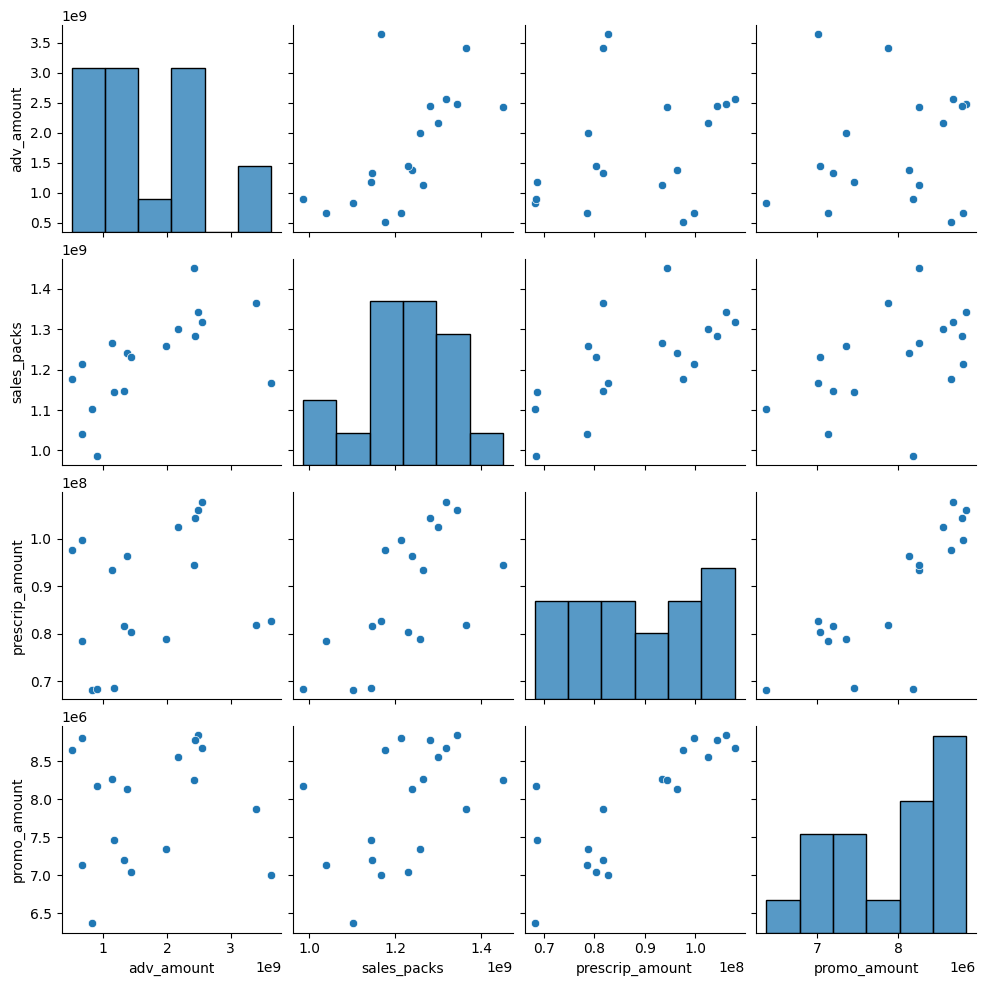

<Figure size 640x480 with 0 Axes>

In [62]:
sns_plot = sns.pairplot(
    data_grp[['adv_amount', 'sales_packs', 'prescrip_amount', 'promo_amount']])
plt.show()
plt.savefig('pairplot_all')

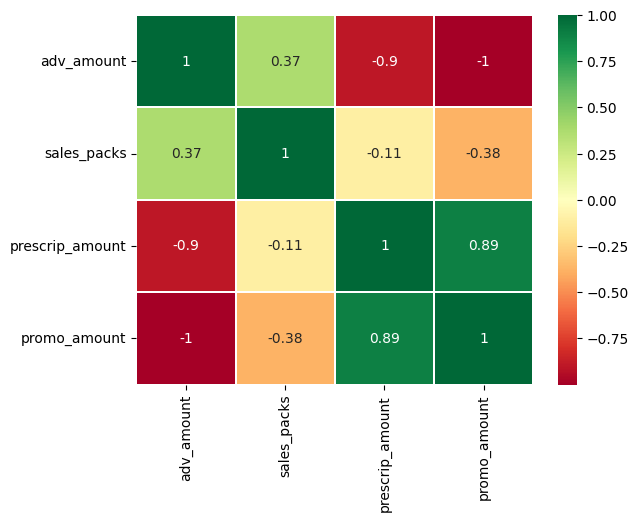

<Figure size 640x480 with 0 Axes>

In [63]:
# расчитываем матрицу корреляции по всему рынку ЛС
data_for_corr = data_grp.filter(items = ['adv_amount', 'sales_packs', 'prescrip_amount', 'promo_amount'])

corr = data_for_corr.corr()
corr = corr.round(2)
sns.heatmap(corr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.show()
plt.savefig('heatmap_all')

1. Наиболее явная прямая корреляция между prescrip_amount' и 'promo_amount (0,89)
2. Наиболее явная обратная корреляция между prescrip_amount' и 'adv_amount (-0,9) и  promo_amount' и 'adv_amount (-1)

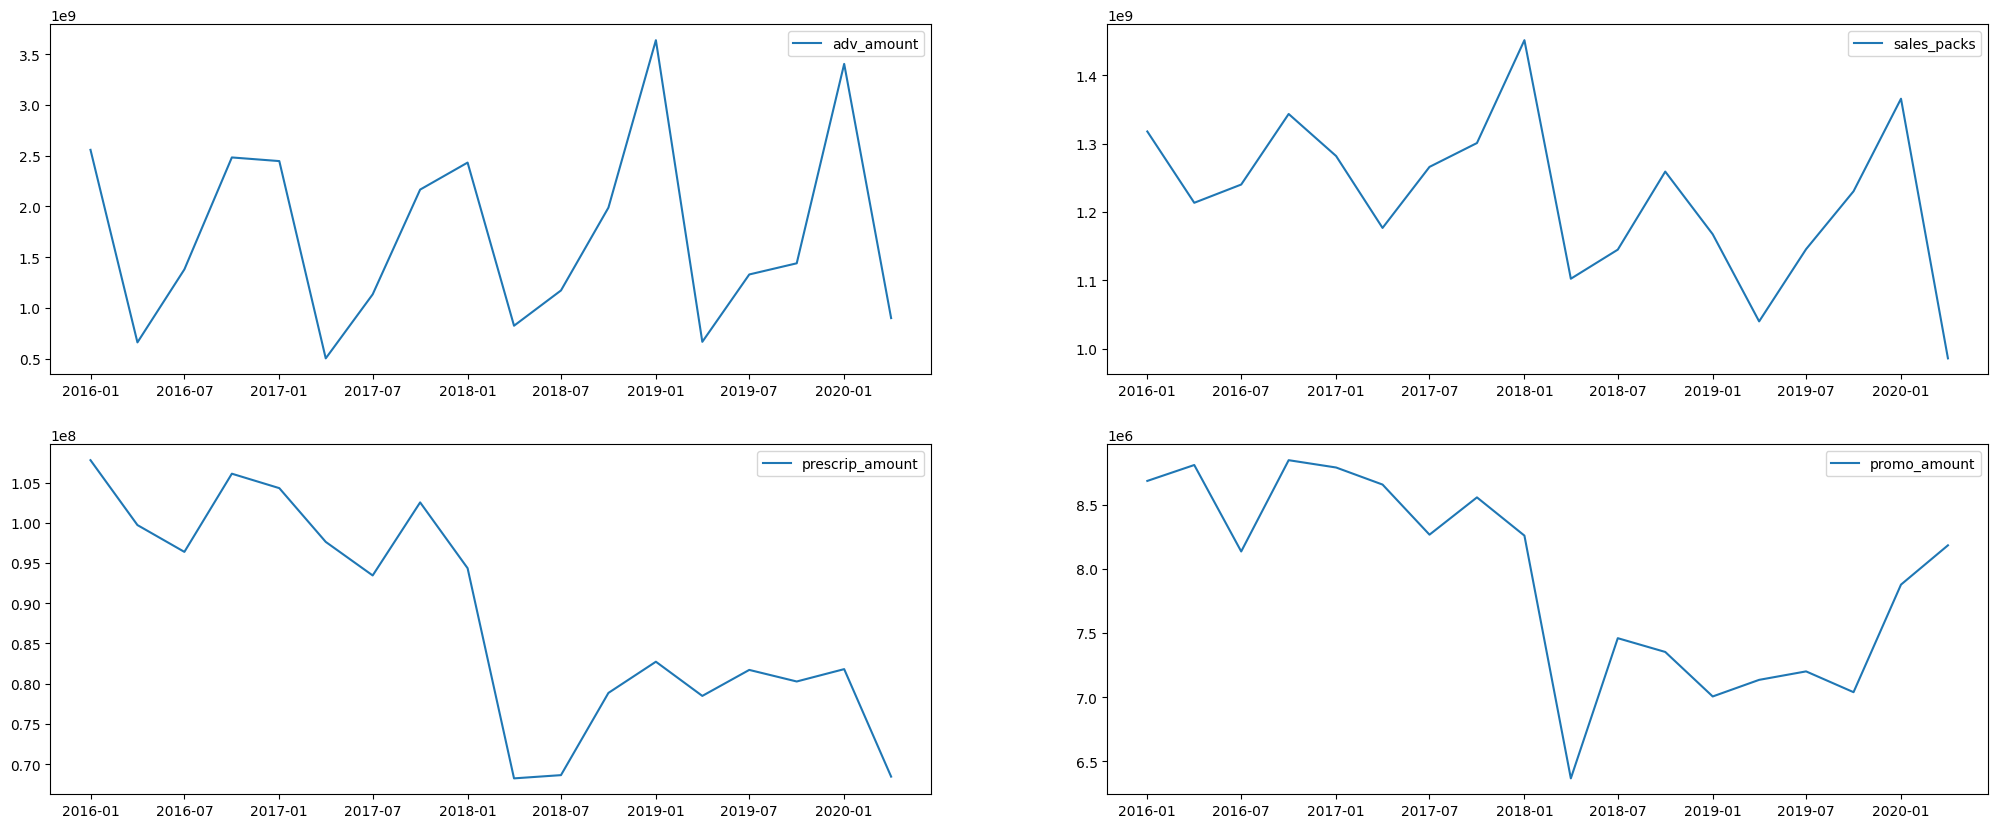

<Figure size 640x480 with 0 Axes>

In [64]:
# смотрим на динамику метрик

x = data_grp['date_2']
y1 = data_grp['adv_amount']
y2 = data_grp['sales_packs']
y3 = data_grp['prescrip_amount']
y4 = data_grp['promo_amount']

plt.figure(figsize=(25, 10))

plt.subplot (2, 2, 1)
plt.plot(x, y1, label="adv_amount")
plt.legend()

plt.subplot (2, 2, 2)
plt.plot(x, y2, label="sales_packs")
plt.legend()

plt.subplot (2, 2, 3)
plt.plot(x, y3, label="prescrip_amount")
plt.legend()

plt.subplot (2, 2, 4)
plt.plot(x, y4, label="promo_amount")
plt.legend()

plt.show()
plt.savefig('динамика_all')

Основные выводы по рынку в целом:
1. В целом в продажах и рекламе наблюдается цикличность (сезонность)
2. Продажи имеют падающий тренд

Попробуем спрогнозировать динамику продаж по рынку в целом классическим ML

In [236]:
def prepareData(data, lag_start=5, lag_end=10, test_size=0.15):

    data = pd.DataFrame(data.copy())

    # считаем индекс в датафрейме, после которого начинается тестовый отрезок
    test_index = int(len(data)*(1-test_size))

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.sales_packs.shift(i)

    data = data.dropna()
    data = data.reset_index(drop=True)
    #data = data.drop(["Date"], axis=1)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.loc[:test_index].drop(["sales_packs"], axis=1)
    y_train = data.loc[:test_index]["sales_packs"]
    X_test = data.loc[test_index+1:].drop(["sales_packs"], axis=1)
    y_test = data.loc[test_index+1:]["sales_packs"]

    return X_train, X_test, y_train, y_test

In [237]:
X_train, X_test, y_train, y_test = prepareData(data_grp['sales_packs'], lag_start=1, lag_end=3, test_size=0.4)

In [238]:
X_train

,lag_1,lag_2
0,1.213515e+09,1.317763e+09
1,1.240191e+09,1.213515e+09
2,1.343344e+09,1.240191e+09
3,1.281845e+09,1.343344e+09
4,1.176766e+09,1.281845e+09
5,1.265974e+09,1.176766e+09
6,1.300857e+09,1.265974e+09
7,1.451196e+09,1.300857e+09
8,1.102514e+09,1.451196e+09
9,1.145026e+09,1.102514e+09


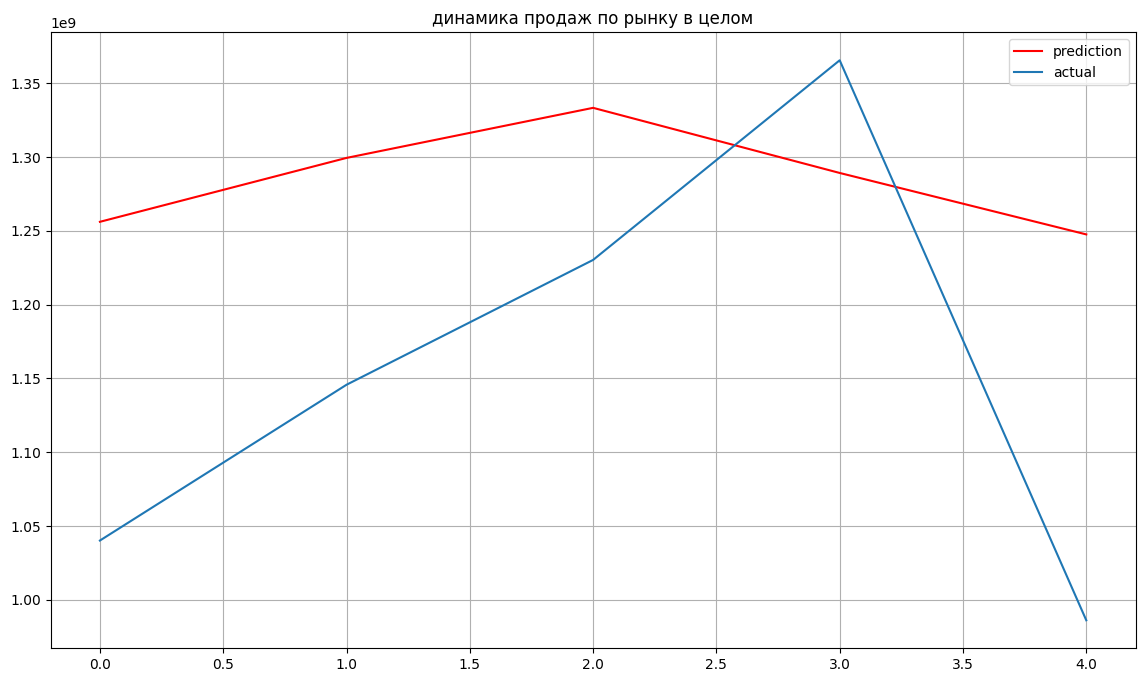

In [239]:
# Строим модель линеной регресии и график предсказания
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

plt.figure(figsize=(14, 8))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("динамика продаж по рынку в целом")
plt.grid(True);
plt.savefig('динамика продаж по рынку в целом')
plt.show()

In [240]:
# оценим качество модели
print(f"MAE: {mean_absolute_error(y_test, prediction)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")
print(f"MSE: {mean_squared_error(y_test, prediction)}")
print(f"R2: {r2_score(y_test, prediction)}")
print(f"Explained variance score: {explained_variance_score(y_test, prediction)}")
print(f"Median absolute error: {median_absolute_error(y_test, prediction)}")

MAE: 162143976.70995098
MAPE: 0.1493546645481228
MSE: 3.102950485354288e+16
R2: -0.6893754820170996
Explained variance score: 0.2534686821041421
Median absolute error: 153741497.15805244


В целом спрогнозировать можно, но из-за малой тестовой выборки ошибка получается слишком большой

## Проанализируем только безрецептурные (ОТС)

In [65]:
# подготавливаем датафреймы изолировано по брендам ОТС - безрецептурные по которым разрешена реклама
market_grp_otc = market[market['Rx/OTC']=='OTC'].groupby('date_2').sum('sales_packs').sort_values(by='date_2')[['sales_packs']]
prescrip_grp_otc = prescrip[prescrip['rx_otc']=='OTC'].groupby('date_2').sum('prescrip_amount').sort_values(by='date_2')[['prescrip_amount']]
promo_grp_otc = promo[promo['rx_otc']=='OTC'].groupby('date_2').sum('promo_amount').sort_values(by='date_2')[['promo_amount']]

# собираем общий датафрейм по: продажам, тв-рекламе, назначениям, промо активностям
data_grp_otc = adv_grp.merge(market_grp_otc, how='left', on='date_2').\
    merge(prescrip_grp_otc, how='left', on='date_2').\
    merge(promo_grp_otc, how='left', on='date_2')

data_grp_otc = data_grp_otc.reset_index()
data_grp_otc

,date_2,adv_amount,sales_packs,prescrip_amount,promo_amount
0,2016-01-01,2.557433e+09,856904765,44088064.0,4405748.0
1,2016-04-01,6.606662e+08,762537981,38605539.0,4296773.0
2,2016-07-01,1.379890e+09,789253129,37950452.0,4084050.0
3,2016-10-01,2.482576e+09,843531001,43032145.0,4522416.0
4,2017-01-01,2.446700e+09,814057907,44589927.0,4428464.0
5,2017-04-01,5.032623e+08,720209483,38287266.0,4332956.0
6,2017-07-01,1.133911e+09,788491437,37368150.0,4169169.0
7,2017-10-01,2.165803e+09,806377733,40910353.0,4424379.0
8,2018-01-01,2.432039e+09,918650457,37762307.0,4247443.0
9,2018-04-01,8.248164e+08,671070869,25810414.0,2970488.0


In [66]:
# удаляем даты с пустыми значениями в столбцах prescr_amount и act_amount
data_grp_otc = data_grp_otc[data_grp_otc['date_2'] < '2019-10-01']
data_grp_otc

,date_2,adv_amount,sales_packs,prescrip_amount,promo_amount
0,2016-01-01,2.557433e+09,856904765,44088064.0,4405748.0
1,2016-04-01,6.606662e+08,762537981,38605539.0,4296773.0
2,2016-07-01,1.379890e+09,789253129,37950452.0,4084050.0
3,2016-10-01,2.482576e+09,843531001,43032145.0,4522416.0
4,2017-01-01,2.446700e+09,814057907,44589927.0,4428464.0
5,2017-04-01,5.032623e+08,720209483,38287266.0,4332956.0
6,2017-07-01,1.133911e+09,788491437,37368150.0,4169169.0
7,2017-10-01,2.165803e+09,806377733,40910353.0,4424379.0
8,2018-01-01,2.432039e+09,918650457,37762307.0,4247443.0
9,2018-04-01,8.248164e+08,671070869,25810414.0,2970488.0


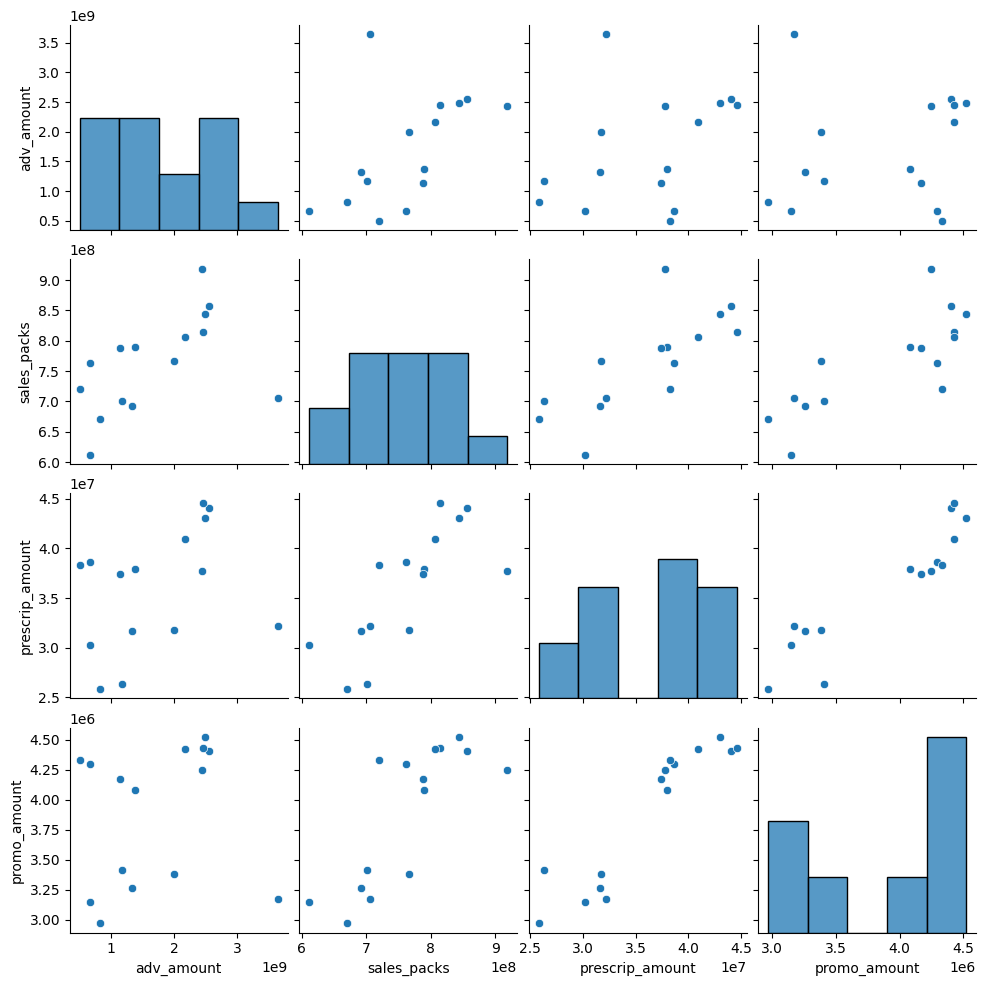

<Figure size 640x480 with 0 Axes>

In [67]:
sns_plot = sns.pairplot(
    data_grp_otc[['adv_amount', 'sales_packs', 'prescrip_amount', 'promo_amount']])
plt.show()
plt.savefig('pairplot_otc')

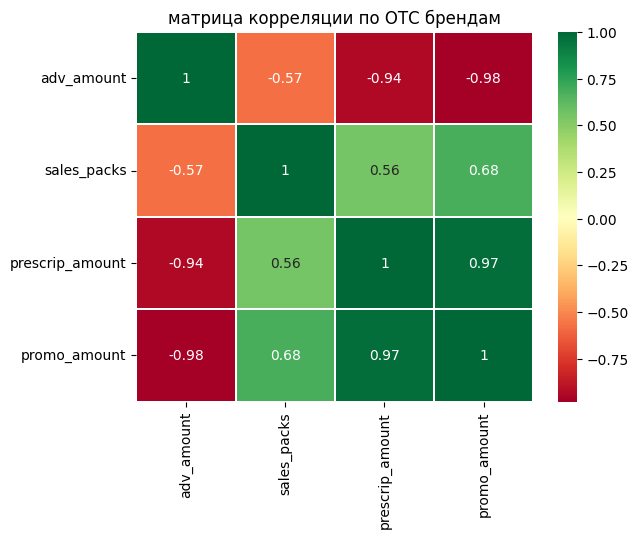

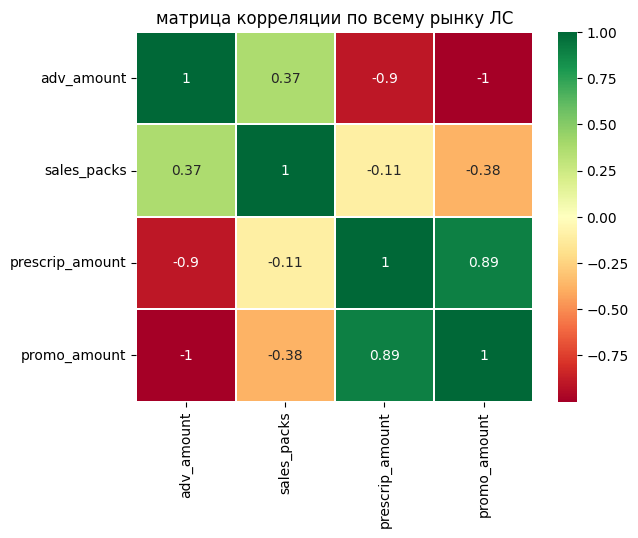

In [68]:
# расчитываем матрицу корреляции по ОТС брендам
data_grp_otc_for_corr = data_grp_otc.filter(items = ['adv_amount', 'sales_packs', 'prescrip_amount', 'promo_amount'])

corr = data_grp_otc_for_corr.corr()
corr = corr.round(2)
sns.heatmap(corr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.title('матрица корреляции по ОТС брендам')
plt.show()
plt.savefig('heatmap_otc')

# расчитываем матрицу корреляции по всему рынку ЛС
data_for_corr = data_grp.filter(items = ['adv_amount', 'sales_packs', 'prescrip_amount', 'promo_amount'])

corr = data_for_corr.corr()
corr = corr.round(2)
sns.heatmap(corr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.title('матрица корреляции по всему рынку ЛС')
plt.show()

ОТС бренды:
1. Наиболее явная прямая корреляция между prescrip_amount' и 'promo_amount (0,97)
2. Наиболее явная обратная корреляция между prescrip_amount' и 'adv_amount (-0,9) и promo_amount' и 'adv_amount (-1)

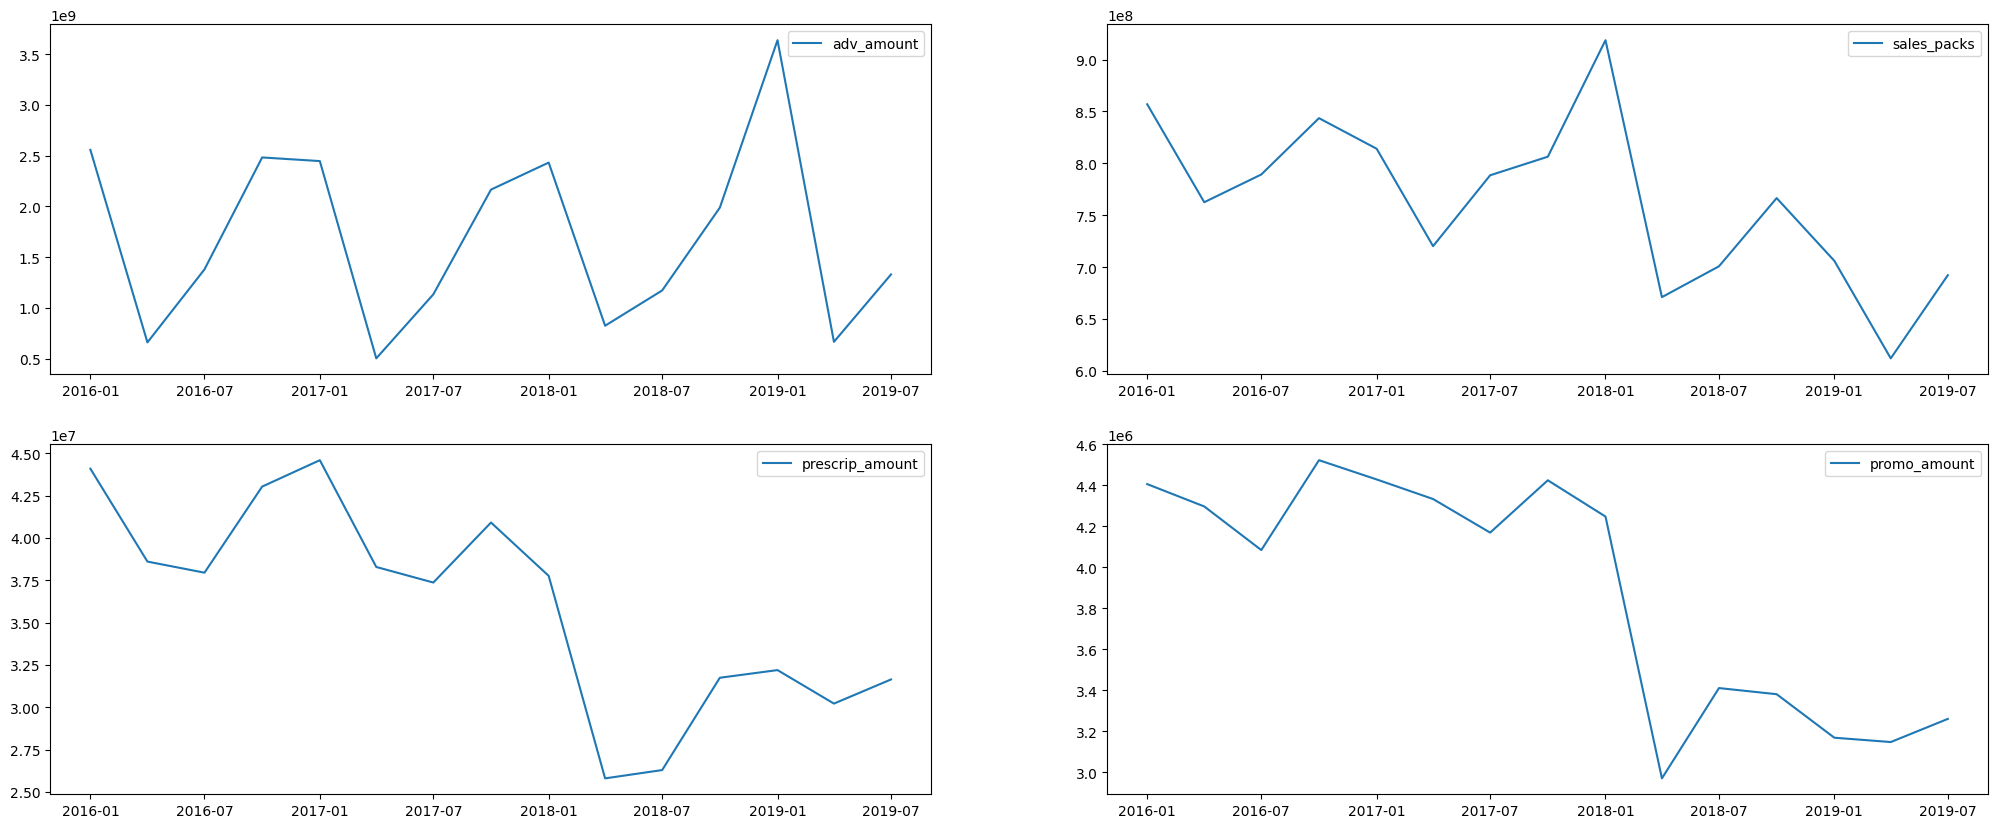

<Figure size 640x480 with 0 Axes>

In [69]:
# смотрим на динамику метрик

x = data_grp_otc['date_2']
y1 = data_grp_otc['adv_amount']
y2 = data_grp_otc['sales_packs']
y3 = data_grp_otc['prescrip_amount']
y4 = data_grp_otc['promo_amount']

plt.figure(figsize=(25, 10))

plt.subplot (2, 2, 1)
plt.plot(x, y1, label="adv_amount")
plt.legend()

plt.subplot (2, 2, 2)
plt.plot(x, y2, label="sales_packs")
plt.legend()

plt.subplot (2, 2, 3)
plt.plot(x, y3, label="prescrip_amount")
plt.legend()

plt.subplot (2, 2, 4)
plt.plot(x, y4, label="promo_amount")
plt.legend()

plt.show()
plt.savefig('динамика_otc')

Основные выводы по безрецептурным препаратам повторяют выводы по рынку в целом:
1. В целом в продажах и рекламе наблюдается цикличность (сезонность)
2. Продажи имеют падающий тренд

Попробуем спрогнозировать динамику продаж по безрецептурным (ОТС) классическим ML

In [241]:
X_train, X_test, y_train, y_test = prepareData(data_grp_otc['sales_packs'], lag_start=1, lag_end=3, test_size=0.4)

In [242]:
X_train

,lag_1,lag_2
0,762537981.0,856904765.0
1,789253129.0,762537981.0
2,843531001.0,789253129.0
3,814057907.0,843531001.0
4,720209483.0,814057907.0
5,788491437.0,720209483.0
6,806377733.0,788491437.0
7,918650457.0,806377733.0
8,671070869.0,918650457.0
9,700795613.0,671070869.0


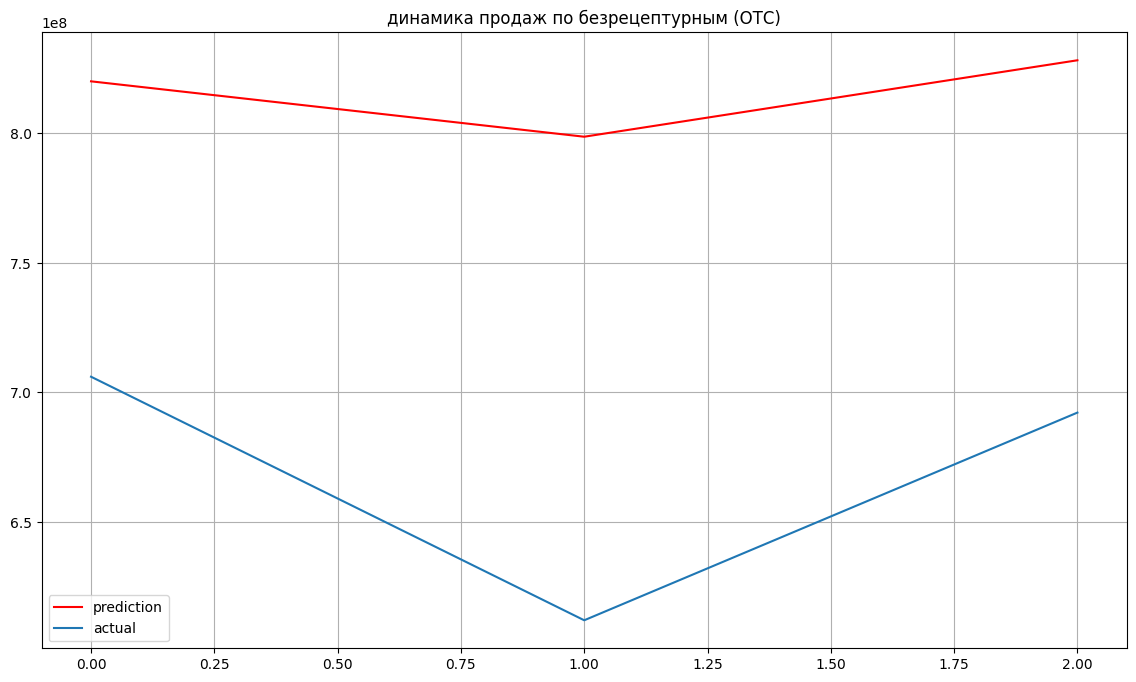

In [243]:
# Строим модель линеной регресии и график предсказания
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

plt.figure(figsize=(14, 8))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("динамика продаж по безрецептурным (ОТС)")
plt.grid(True);
plt.savefig('динамика продаж по безрецептурным (ОТС)')
plt.show()

In [244]:
# оценим качество модели
print(f"MAE: {mean_absolute_error(y_test, prediction)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")
print(f"MSE: {mean_squared_error(y_test, prediction)}")
print(f"R2: {r2_score(y_test, prediction)}")
print(f"Explained variance score: {explained_variance_score(y_test, prediction)}")
print(f"Median absolute error: {median_absolute_error(y_test, prediction)}")

MAE: 145495531.86788797
MAPE: 0.2208747335112654
MSE: 2.2093103110907388e+16
R2: -11.875162359581312
Explained variance score: 0.4614326495113735
Median absolute error: 135939001.1277449


В целом спрогнозировать можно, но из-за малой тестовой выборки ошибка получается слишком большой

## Проанализируем только рецептурные (RX)

In [70]:
# подготавливаем датафреймы изолировано по брендам RX

market_grp_rx = market[market['Rx/OTC']=='Rx'].groupby('date_2').sum('sales_packs').sort_values(by='date_2')[['sales_packs']]
prescrip_grp_rx = prescrip[prescrip['rx_otc']=='Rx'].groupby('date_2').sum('prescrip_amount').sort_values(by='date_2')[['prescrip_amount']]
promo_grp_rx = promo[promo['rx_otc']=='Rx'].groupby('date_2').sum('promo_amount').sort_values(by='date_2')[['promo_amount']]

# собираем общий датафрейм по: продажам, тв-рекламе, назначениям, промо активностям
data_grp_rx = adv_grp.merge(market_grp_rx, how='left', on='date_2').\
    merge(prescrip_grp_rx, how='left', on='date_2').\
    merge(promo_grp_rx, how='left', on='date_2')

data_grp_rx = data_grp_rx.reset_index()
data_grp_rx = data_grp_rx[data_grp_rx['date_2'] < '2019-10-01']
data_grp_rx

,date_2,adv_amount,sales_packs,prescrip_amount,promo_amount
0,2016-01-01,2.557433e+09,460858212,63690207.0,4277876.0
1,2016-04-01,6.606662e+08,450977042,61110662.0,4510655.0
2,2016-07-01,1.379890e+09,450937470,58433768.0,4050479.0
3,2016-10-01,2.482576e+09,499813485,63067559.0,4322573.0
4,2017-01-01,2.446700e+09,467787276,59714214.0,4359519.0
5,2017-04-01,5.032623e+08,456556186,59338164.0,4322290.0
6,2017-07-01,1.133911e+09,477482728,56086357.0,4096127.0
7,2017-10-01,2.165803e+09,494479585,61622825.0,4131127.0
8,2018-01-01,2.432039e+09,532545651,56591681.0,4010579.0
9,2018-04-01,8.248164e+08,431443422,42429085.0,3398072.0


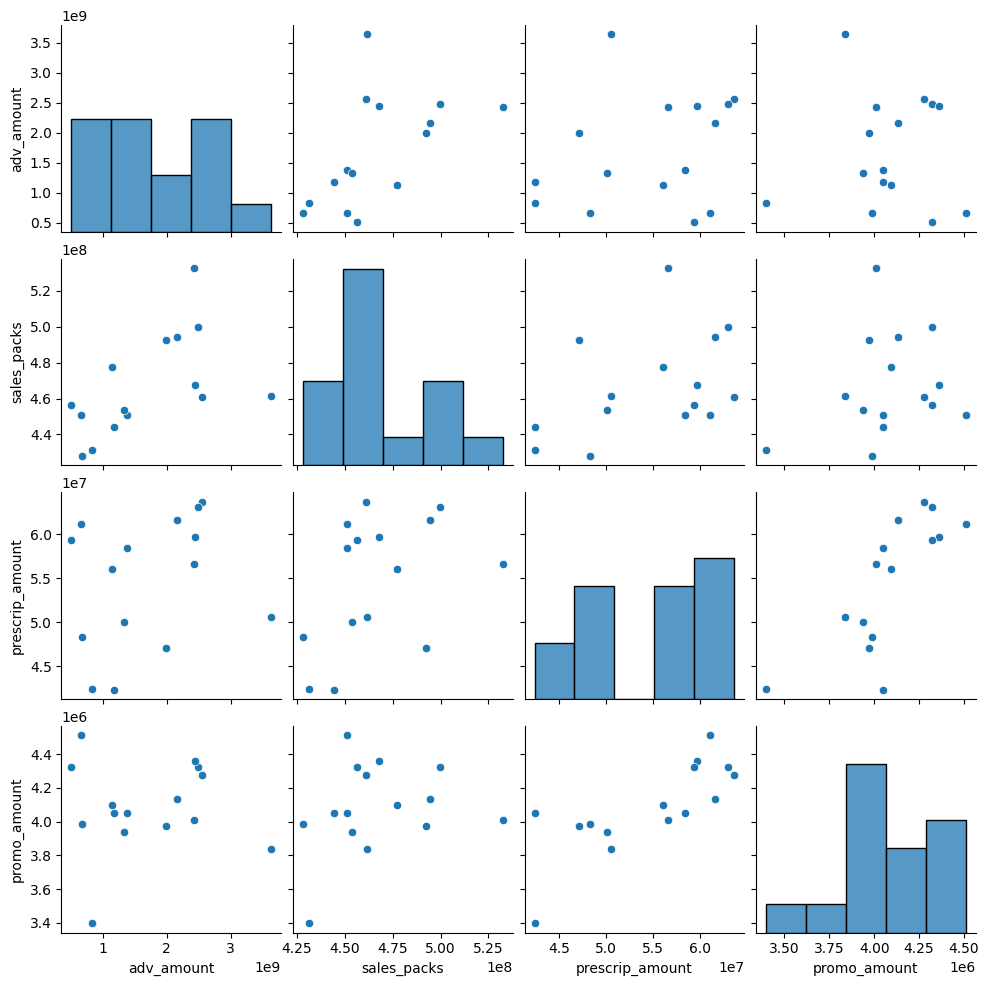

<Figure size 640x480 with 0 Axes>

In [71]:
sns_plot = sns.pairplot(
    data_grp_rx[['adv_amount', 'sales_packs', 'prescrip_amount', 'promo_amount']])
plt.show()
plt.savefig('pairplot_rx')

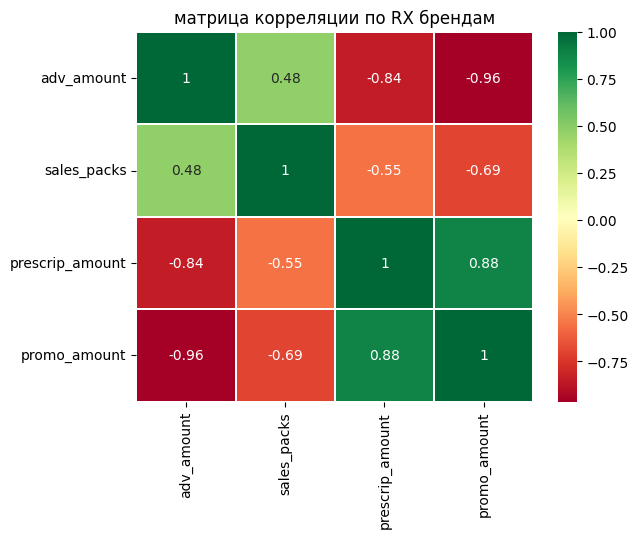

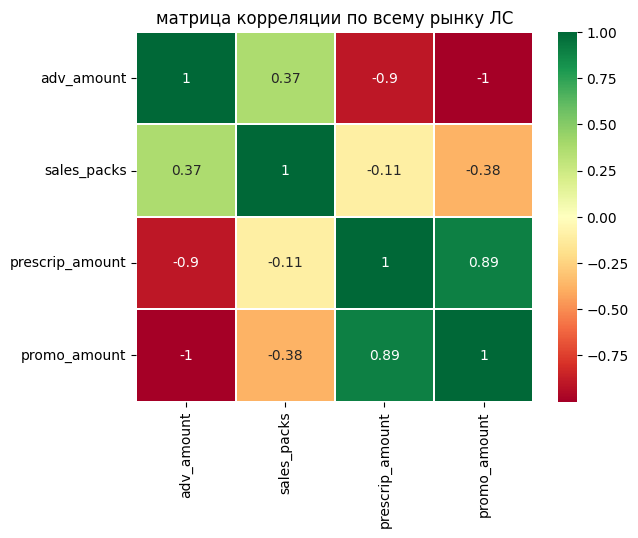

In [72]:
# расчитываем матрицу корреляции по RX брендам
data_grp_rx_for_corr = data_grp_rx.filter(items = ['adv_amount', 'sales_packs', 'prescrip_amount', 'promo_amount'])

corr = data_grp_rx_for_corr.corr()
corr = corr.round(2)
sns.heatmap(corr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.title('матрица корреляции по RX брендам')
plt.show()
plt.savefig('heatmap_rx')

# расчитываем матрицу корреляции по всему рынку ЛС
data_for_corr = data_grp.filter(items = ['adv_amount', 'sales_packs', 'prescrip_amount', 'promo_amount'])

corr = data_for_corr.corr()
corr = corr.round(2)
sns.heatmap(corr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.title('матрица корреляции по всему рынку ЛС')
plt.show()

RX бренды повторяют ОТС и рынок в целом:
1. Наиболее явная прямая корреляция между prescrip_amount' и 'promo_amount (0,88)
2. Наиболее явная обратная корреляция между prescrip_amount' и 'adv_amount (-0,84) и promo_amount' и 'adv_amount (-0,96)

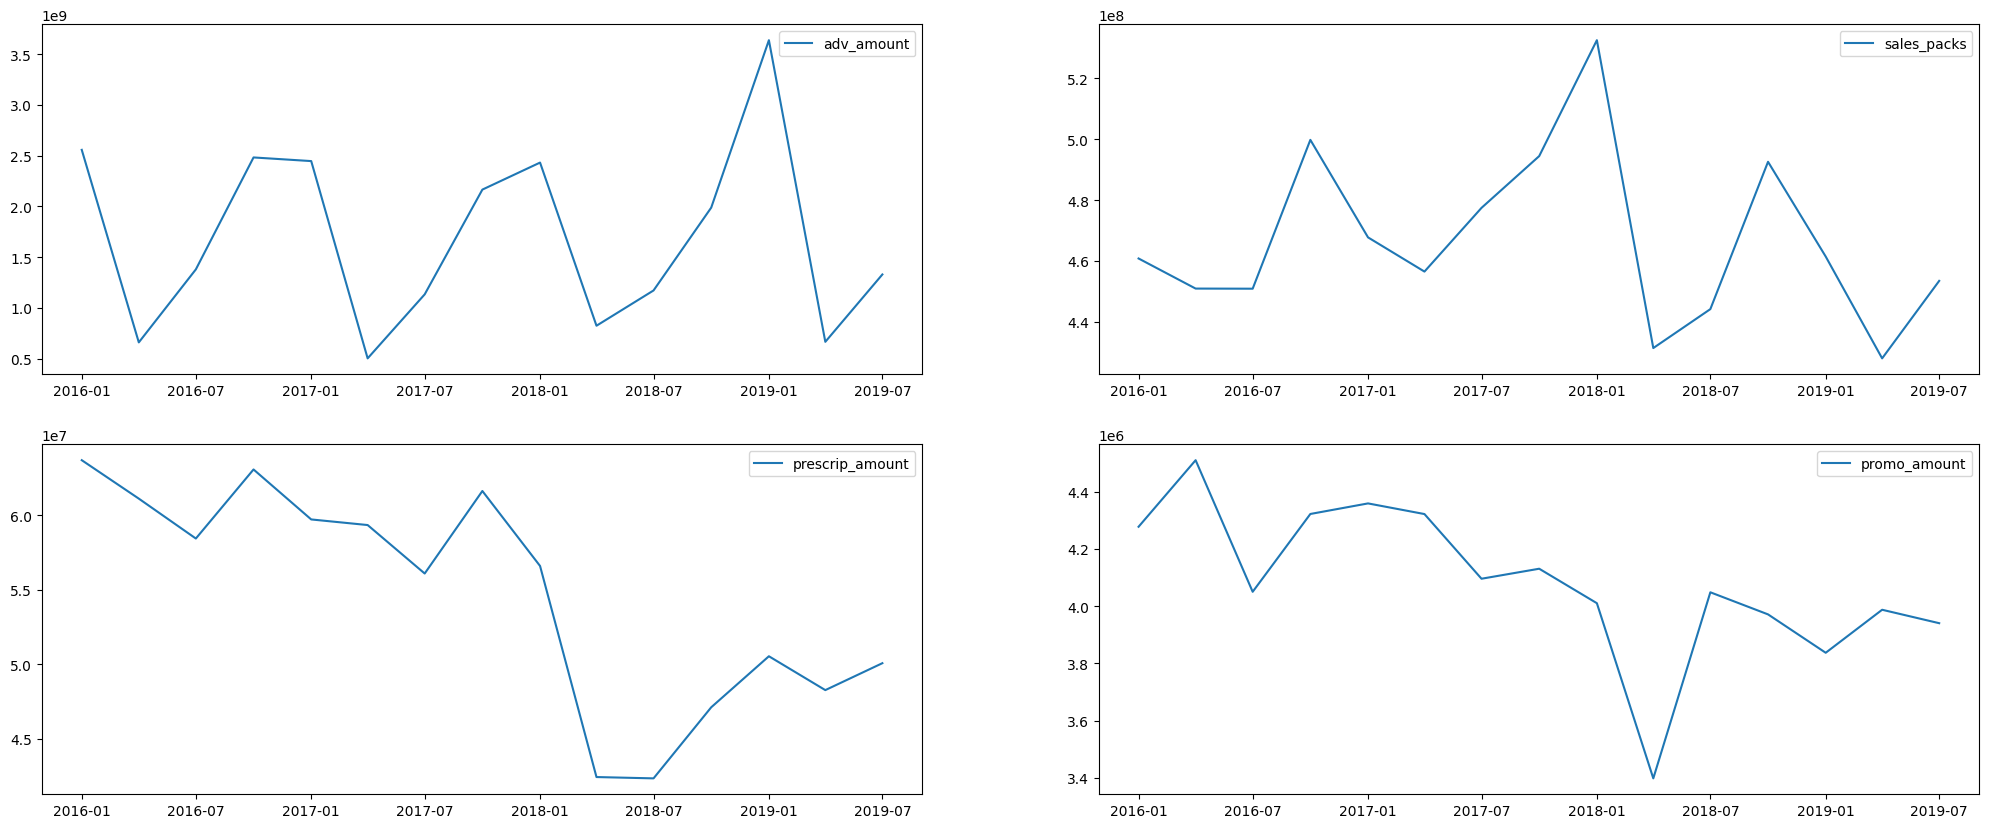

<Figure size 640x480 with 0 Axes>

In [73]:
# смотрим на динамику метрик

x = data_grp_rx['date_2']
y1 = data_grp_rx['adv_amount']
y2 = data_grp_rx['sales_packs']
y3 = data_grp_rx['prescrip_amount']
y4 = data_grp_rx['promo_amount']

plt.figure(figsize=(25, 10))

plt.subplot (2, 2, 1)
plt.plot(x, y1, label="adv_amount")
plt.legend()

plt.subplot (2, 2, 2)
plt.plot(x, y2, label="sales_packs")
plt.legend()

plt.subplot (2, 2, 3)
plt.plot(x, y3, label="prescrip_amount")
plt.legend()

plt.subplot (2, 2, 4)
plt.plot(x, y4, label="promo_amount")
plt.legend()

plt.show()
plt.savefig('динамика_rx')

Основные выводы по рецептурным препаратам повторяют выводы по рынку в целом и по безрецептурным. Повтрять не имеет смысла

Попробуем спрогнозировать динамику продаж по рецептурным (RX) классическим ML

In [245]:
X_train, X_test, y_train, y_test = prepareData(data_grp_rx['sales_packs'], lag_start=1, lag_end=3, test_size=0.4)

In [246]:
X_train

,lag_1,lag_2
0,450977042.0,460858212.0
1,450937470.0,450977042.0
2,499813485.0,450937470.0
3,467787276.0,499813485.0
4,456556186.0,467787276.0
5,477482728.0,456556186.0
6,494479585.0,477482728.0
7,532545651.0,494479585.0
8,431443422.0,532545651.0
9,444230156.0,431443422.0


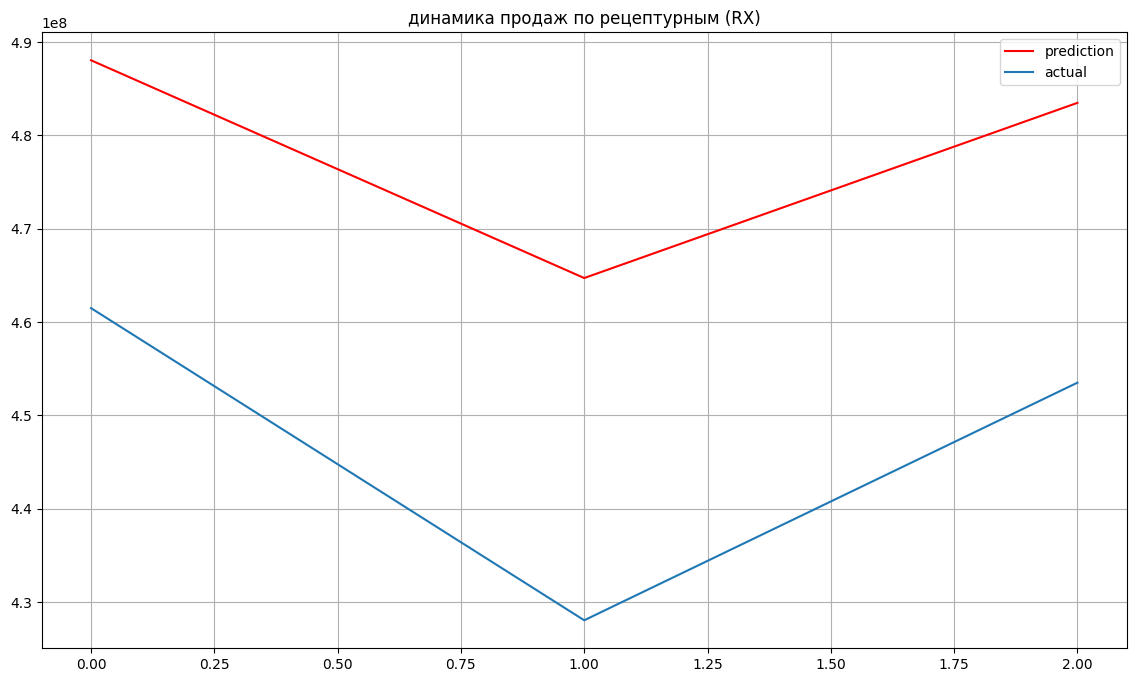

In [247]:
# Строим модель линеной регресии и график предсказания
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

plt.figure(figsize=(14, 8))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("динамика продаж по рецептурным (RX)")
plt.grid(True);
plt.savefig('динамика продаж по рецептурным (RX)')
plt.show()

In [248]:
# оценим качество модели
print(f"MAE: {mean_absolute_error(y_test, prediction)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")
print(f"MSE: {mean_squared_error(y_test, prediction)}")
print(f"R2: {r2_score(y_test, prediction)}")
print(f"Explained variance score: {explained_variance_score(y_test, prediction)}")
print(f"Median absolute error: {median_absolute_error(y_test, prediction)}")

MAE: 31058107.002432186
MAPE: 0.069748587709672
MSE: 982232450814740.6
R2: -3.8326295585384953
Explained variance score: 0.9132770903201055
Median absolute error: 29970594.63777131


В целом спрогнозировать можно, но из-за малой тестовой выборки ошибка получается слишком большой

Посмотрим, какие представлены категории и бренды препаратов в данных и выберем категорию и бренды для дальнейшего анализа

In [94]:
print(adv['category1'].unique(),'\n')
print(adv['brand'].unique())

['БИОЛОГИЧЕСКИ АКТИВНЫЕ ДОБАВКИ (БАД)'
 'БИОЛОГИЧЕСКИ АКТИВНЫЕ ДОБАВКИ (БАД); ИММУНОСТИМУЛИРУЮЩИЕ СРЕДСТВА'
 'БИОЛОГИЧЕСКИ АКТИВНЫЕ ДОБАВКИ (БАД); КОСВЕННАЯ РЕКЛАМА'
 'БИОЛОГИЧЕСКИ АКТИВНЫЕ ДОБАВКИ (БАД); СР-ВА ДЛЯ ЛЕЧЕНИЯ НАРУШЕНИЙ ОБМЕНА ВЕЩ-ТВ'
 'БИОЛОГИЧЕСКИ АКТИВНЫЕ ДОБАВКИ (БАД); СРЕДСТВА ОТ МЫШЕЧНЫХ И СУСТАВНЫХ БОЛЕЙ'
 'БИОЛОГИЧЕСКИ АКТИВНЫЕ ДОБАВКИ (БАД); СРЕДСТВА ОТ МЫШЕЧНЫХ И СУСТАВНЫХ БОЛЕЙ; УРОЛОГИЧЕСКИЕ СРЕДСТВА'
 'БИОЛОГИЧЕСКИ АКТИВНЫЕ ДОБАВКИ (БАД); СРЕДСТВА ПО УХОДУ ЗА ЛИЦОМ'
 'ГАСТРОЭНТЕРОЛОГИЧЕСКИЕ СРЕДСТВА'
 'ГАСТРОЭНТЕРОЛОГИЧЕСКИЕ СРЕДСТВА; ИНТЕРНЕТ-ТОРГОВЛЯ; ПРОТИВОИНФЕКЦИОННЫЕ СРЕДСТВА; ПСИХОТРОПНЫЕ И НЕВРОЛОГИЧЕСКИЕ СРЕДСТВА'
 'ГАСТРОЭНТЕРОЛОГИЧЕСКИЕ СРЕДСТВА; ИНТЕРНЕТ-ТОРГОВЛЯ; ПРОТИВОИНФЕКЦИОННЫЕ СРЕДСТВА; СРЕДСТВА ОТ ПРОСТУДЫ И ГРИППА'
 'ГАСТРОЭНТЕРОЛОГИЧЕСКИЕ СРЕДСТВА; ОБЕЗБОЛИВАЮЩИЕ И ЖАРОПОНИЖАЮЩИЕ ПРЕПАРАТЫ; ПСИХОТРОПНЫЕ И НЕВРОЛОГИЧЕСКИЕ СРЕДСТВА; ТОРГОВЫЕ ОРГАНИЗАЦИИ'
 'ГАСТРОЭНТЕРОЛОГИЧЕСКИЕ СРЕДСТВА; ПРОТИВОИНФЕКЦИОННЫЕ СРЕДСТВА; ТОРГОВЫЕ ОРГАНИЗАЦИИ'


Данные по категориям разрозненные, неконсолидированные, отсуствутет четкая структура

In [76]:
print(market['brand'].unique())
print(market['brand'].count())

['БАКЛОСАН' 'ЦЕФОПЕРАЗОН' 'ФИТОФРОН' ... 'ЗИЛАКОМБ' 'АДЕНОЦИН' 'ЦИПРОБРИН']
274482


In [77]:
print(prescrip['brand'].unique())
print(prescrip['brand'].count())

['5-НОК' '5-ФТОРУРАЦИЛ' 'L-АСПАРАГИНАЗА' ... 'ЭЛОКОМ-С' 'ЭСОМЕЗ'
 'ЭСПЕРАВИР']
105196


In [78]:
print(promo['brand'].unique())
print(promo['brand'].count())

['АЗИДРОП' 'АЗИМИЦИН' 'АЗИТРОМИЦИН ЗЕНТ' ... 'КАМПТО' 'СПИГЕЛОН'
 'КОНДИЛИН']
272200


## Проанализируем категорию "ГОМЕОПАТИЧЕСКИЕ И ПРИРОДНЫЕ СРЕДСТВА"

In [98]:
# загрузим только категрию "ГОМЕОПАТИЧЕСКИЕ И ПРИРОДНЫЕ СРЕДСТВА"
adv1 = adv[adv['category1'] == 'ГОМЕОПАТИЧЕСКИЕ И ПРИРОДНЫЕ СРЕДСТВА']
print(adv1['brand'].count())
print(adv1['brand'].unique())

488
['ОЦИЛЛОКОКЦИНУМ' 'АНАФЕРОН' 'АНАФЕРОН ДЕТСКИЙ' 'АФАЛА' 'АФАЛАЗА' 'ИМПАЗА'
 'РЕНГАЛИН' 'ТЕНОТЕН' 'ТЕНОТЕН ДЕТСКИЙ']


In [99]:
# формируем датафреймы для категории "ГОМЕОПАТИЧЕСКИЕ И ПРИРОДНЫЕ СРЕДСТВА" из 9-ти брендов

adv_gomeopath = adv[
    (adv['brand'] == 'ОЦИЛЛОКОКЦИНУМ') |
    (adv['brand'] == 'АНАФЕРОН') |
    (adv['brand'] == 'АНАФЕРОН ДЕТСКИЙ') |
    (adv['brand'] == 'АФАЛА') |
    (adv['brand'] == 'АФАЛАЗА') |
    (adv['brand'] == 'ИМПАЗА') |
    (adv['brand'] == 'РЕНГАЛИН') |
    (adv['brand'] == 'ТЕНОТЕН') |
    (adv['brand'] == 'ТЕНОТЕН ДЕТСКИЙ')
]

market_gomeopath = market[
    (market['brand'] == 'ОЦИЛЛОКОКЦИНУМ') |
    (market['brand'] == 'АНАФЕРОН') |
    (market['brand'] == 'АНАФЕРОН ДЕТСКИЙ') |
    (market['brand'] == 'АФАЛА') |
    (market['brand'] == 'АФАЛАЗА') |
    (market['brand'] == 'ИМПАЗА') |
    (market['brand'] == 'РЕНГАЛИН') |
    (market['brand'] == 'ТЕНОТЕН') |
    (market['brand'] == 'ТЕНОТЕН ДЕТСКИЙ')
]

prescrip_gomeopath = prescrip[
    (prescrip['brand'] == 'ОЦИЛЛОКОКЦИНУМ') |
    (prescrip['brand'] == 'АНАФЕРОН') |
    (prescrip['brand'] == 'АНАФЕРОН ДЕТСКИЙ') |
    (prescrip['brand'] == 'АФАЛА') |
    (prescrip['brand'] == 'АФАЛАЗА') |
    (prescrip['brand'] == 'ИМПАЗА') |
    (prescrip['brand'] == 'РЕНГАЛИН') |
    (prescrip['brand'] == 'ТЕНОТЕН') |
    (prescrip['brand'] == 'ТЕНОТЕН ДЕТСКИЙ')
]

promo_gomeopath = promo[
    (promo['brand'] == 'ОЦИЛЛОКОКЦИНУМ') |
    (promo['brand'] == 'АНАФЕРОН') |
    (promo['brand'] == 'АНАФЕРОН ДЕТСКИЙ') |
    (promo['brand'] == 'АФАЛА') |
    (promo['brand'] == 'АФАЛАЗА') |
    (promo['brand'] == 'ИМПАЗА') |
    (promo['brand'] == 'РЕНГАЛИН') |
    (promo['brand'] == 'ТЕНОТЕН') |
    (promo['brand'] == 'ТЕНОТЕН ДЕТСКИЙ')
]

In [102]:
# преобразуем дату в таблице adv_gomeopath
adv_gomeopath['date_2'] = adv_gomeopath.apply(date_adv, axis=1)
adv_gomeopath['date_2'] = pd.to_datetime(adv_gomeopath['date_2'], format='%Y-%m-%d')
adv_gomeopath['adv_amount'] = pd.to_numeric(adv_gomeopath['amount'], errors='coerce')
adv_gomeopath_grp = adv_gomeopath.groupby('date_2').sum('adv_amount').sort_values(by='date_2')[['adv_amount']]
adv_gomeopath_grp

,adv_amount
date_2,
2016-01-01,229600159
2016-04-01,14703812
2016-07-01,68801651
2016-10-01,268606993
2017-01-01,158837878
2017-04-01,1129091
2017-07-01,62912741
2017-10-01,265989896
2018-01-01,184866153


In [103]:
# преобразуем дату в таблице market
market_gomeopath['date_2'] = market_gomeopath.apply(date_market, axis=1)
market_gomeopath['date_2'] = pd.to_datetime(market_gomeopath['date_2'], format='%Y-%m-%d')
market_gomeopath['sales_packs'] = pd.to_numeric(market_gomeopath['sales_packs'], errors='coerce')
market_gomeopath_grp = market_gomeopath.groupby('date_2').sum('sales_packs').sort_values(by='date_2')[['sales_packs']]
market_gomeopath_grp

,sales_packs
date_2,
2016-01-01,7341054
2016-04-01,4753450
2016-07-01,5342340
2016-10-01,6624198
2017-01-01,6468099
2017-04-01,3844788
2017-07-01,4640426
2017-10-01,6748648
2018-01-01,7987501


In [104]:
# преобразуем дату в таблице prescrip
prescrip_gomeopath['date_2'] = prescrip_gomeopath.apply(date_prescrip, axis=1)
prescrip_gomeopath['date_2'] = pd.to_datetime(prescrip_gomeopath['date_2'], format='%Y-%m-%d')
prescrip_gomeopath['prescrip_amount'] = pd.to_numeric(prescrip_gomeopath['amount'], errors='coerce')
prescrip_gomeopath_grp = prescrip_gomeopath.groupby('date_2').sum('prescrip_amount').sort_values(by='date_2')[['prescrip_amount']]
prescrip_gomeopath_grp

,prescrip_amount
date_2,
2016-01-01,869194
2016-04-01,663758
2016-07-01,717895
2016-10-01,830157
2017-01-01,814968
2017-04-01,781456
2017-07-01,737721
2017-10-01,874482
2018-01-01,647311


In [105]:
# преобразуем дату в таблице promo
promo_gomeopath['date_2'] = promo_gomeopath.apply(date_promo, axis=1)
promo_gomeopath['date_2'] = pd.to_datetime(promo_gomeopath['date_2'], format='%Y-%m-%d')
promo_gomeopath['promo_amount'] = pd.to_numeric(promo_gomeopath['amount'], errors='coerce')
promo_gomeopath_grp = promo_gomeopath.groupby('date_2').sum('promo_amount').sort_values(by='date_2')[['promo_amount']]
promo_gomeopath_grp

,promo_amount
date_2,
2016-01-01,213536
2016-04-01,134034
2016-07-01,117025
2016-10-01,177969
2017-01-01,159844
2017-04-01,142624
2017-07-01,116687
2017-10-01,149427
2018-01-01,147899


In [106]:
# собираем общий датафрейм по продажам, тв-рекламе, назначениям, промо активностям
data_gomeopath_grp = adv_gomeopath_grp.merge(market_gomeopath_grp, how='left', on='date_2').\
    merge(prescrip_gomeopath_grp, how='left', on='date_2').\
    merge(promo_gomeopath_grp, how='left', on='date_2')

data_gomeopath_grp = data_gomeopath_grp.reset_index()
data_gomeopath_grp

,date_2,adv_amount,sales_packs,prescrip_amount,promo_amount
0,2016-01-01,229600159,7341054,869194,213536
1,2016-04-01,14703812,4753450,663758,134034
2,2016-07-01,68801651,5342340,717895,117025
3,2016-10-01,268606993,6624198,830157,177969
4,2017-01-01,158837878,6468099,814968,159844
5,2017-04-01,1129091,3844788,781456,142624
6,2017-07-01,62912741,4640426,737721,116687
7,2017-10-01,265989896,6748648,874482,149427
8,2018-01-01,184866153,7987501,647311,147899
9,2018-07-01,48964929,4230002,491200,81535


In [107]:
data_gomeopath_grp.isna().sum()

,0
date_2,0
adv_amount,0
sales_packs,0
prescrip_amount,0
promo_amount,0


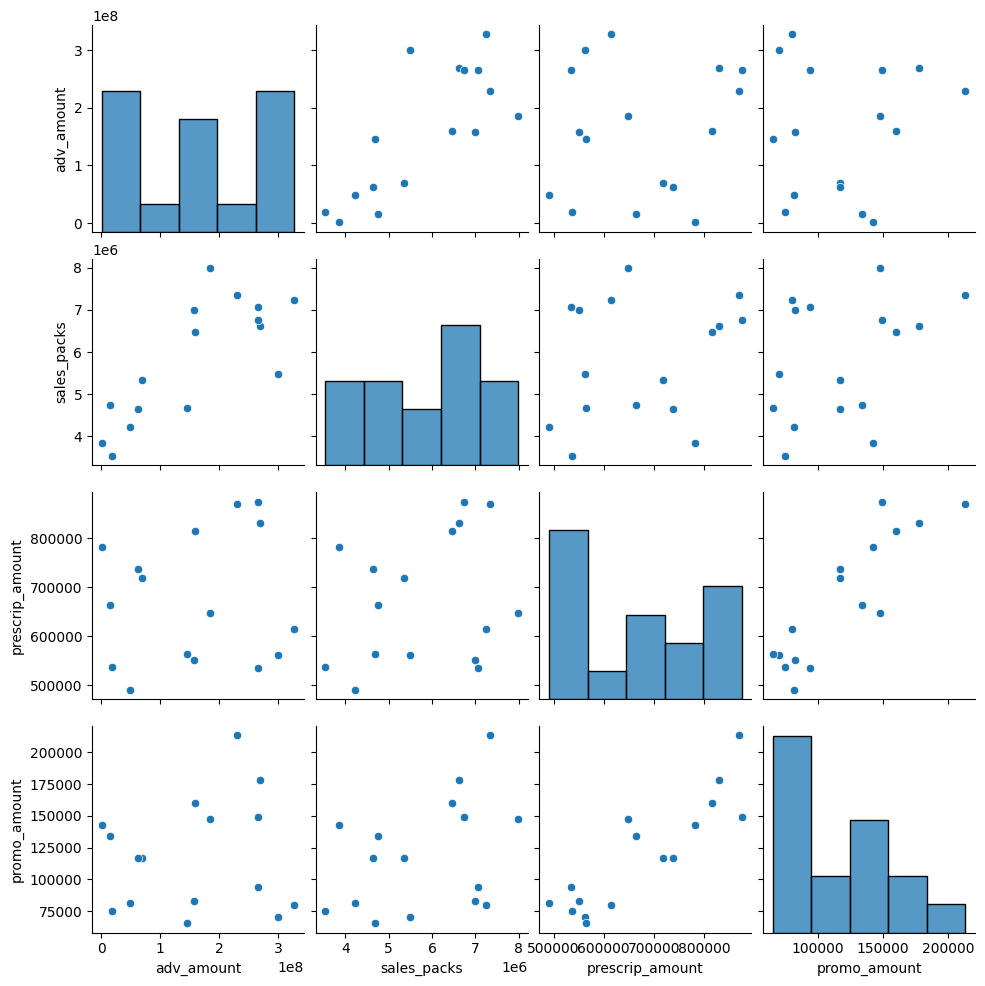

<Figure size 640x480 with 0 Axes>

In [108]:
sns_plot = sns.pairplot(
    data_gomeopath_grp[['adv_amount', 'sales_packs', 'prescrip_amount', 'promo_amount']])
plt.show()
plt.savefig('pairplot_gomeopath')

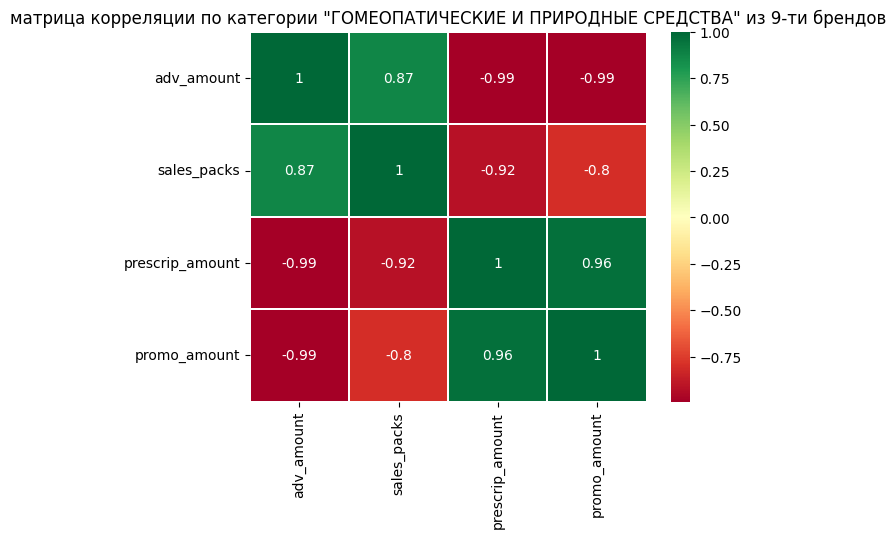

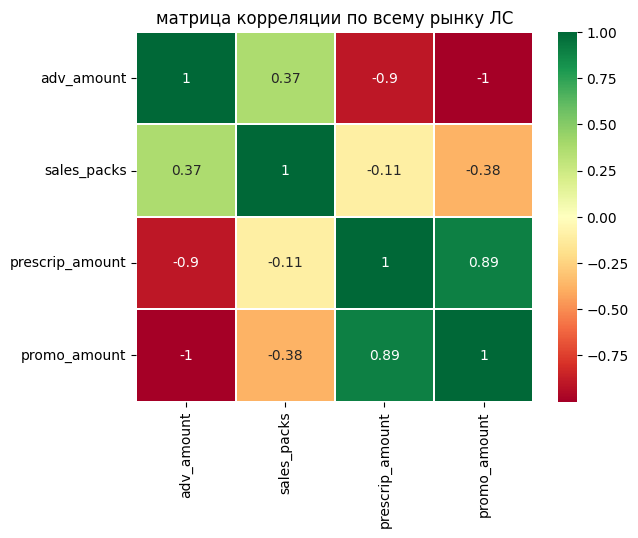

In [109]:
# расчитываем матрицу корреляции по категории "ГОМЕОПАТИЧЕСКИЕ И ПРИРОДНЫЕ СРЕДСТВА" из 9-ти брендов
data_gomeopath_grp_for_corr = data_gomeopath_grp.filter(items = ['adv_amount', 'sales_packs', 'prescrip_amount', 'promo_amount'])

corr = data_gomeopath_grp_for_corr.corr()
corr = corr.round(2)
sns.heatmap(corr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.title('матрица корреляции по категории "ГОМЕОПАТИЧЕСКИЕ И ПРИРОДНЫЕ СРЕДСТВА" из 9-ти брендов')
plt.show()
plt.savefig('heatmap_gomeopath')

# расчитываем матрицу корреляции по всему рынку ЛС
data_for_corr = data_grp.filter(items = ['adv_amount', 'sales_packs', 'prescrip_amount', 'promo_amount'])

corr = data_for_corr.corr()
corr = corr.round(2)
sns.heatmap(corr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.title('матрица корреляции по всему рынку ЛС')
plt.show()

Категория "ГОМЕОПАТИЧЕСКИЕ И ПРИРОДНЫЕ СРЕДСТВА" из 9-ти брендов:
1. Наиболее явная прямая корреляция между prescrip_amount' и 'promo_amount (0,96)
2. Наиболее явная обратная корреляция между prescrip_amount' и 'adv_amount (-0,99) и promo_amount' и 'adv_amount (-0,99)

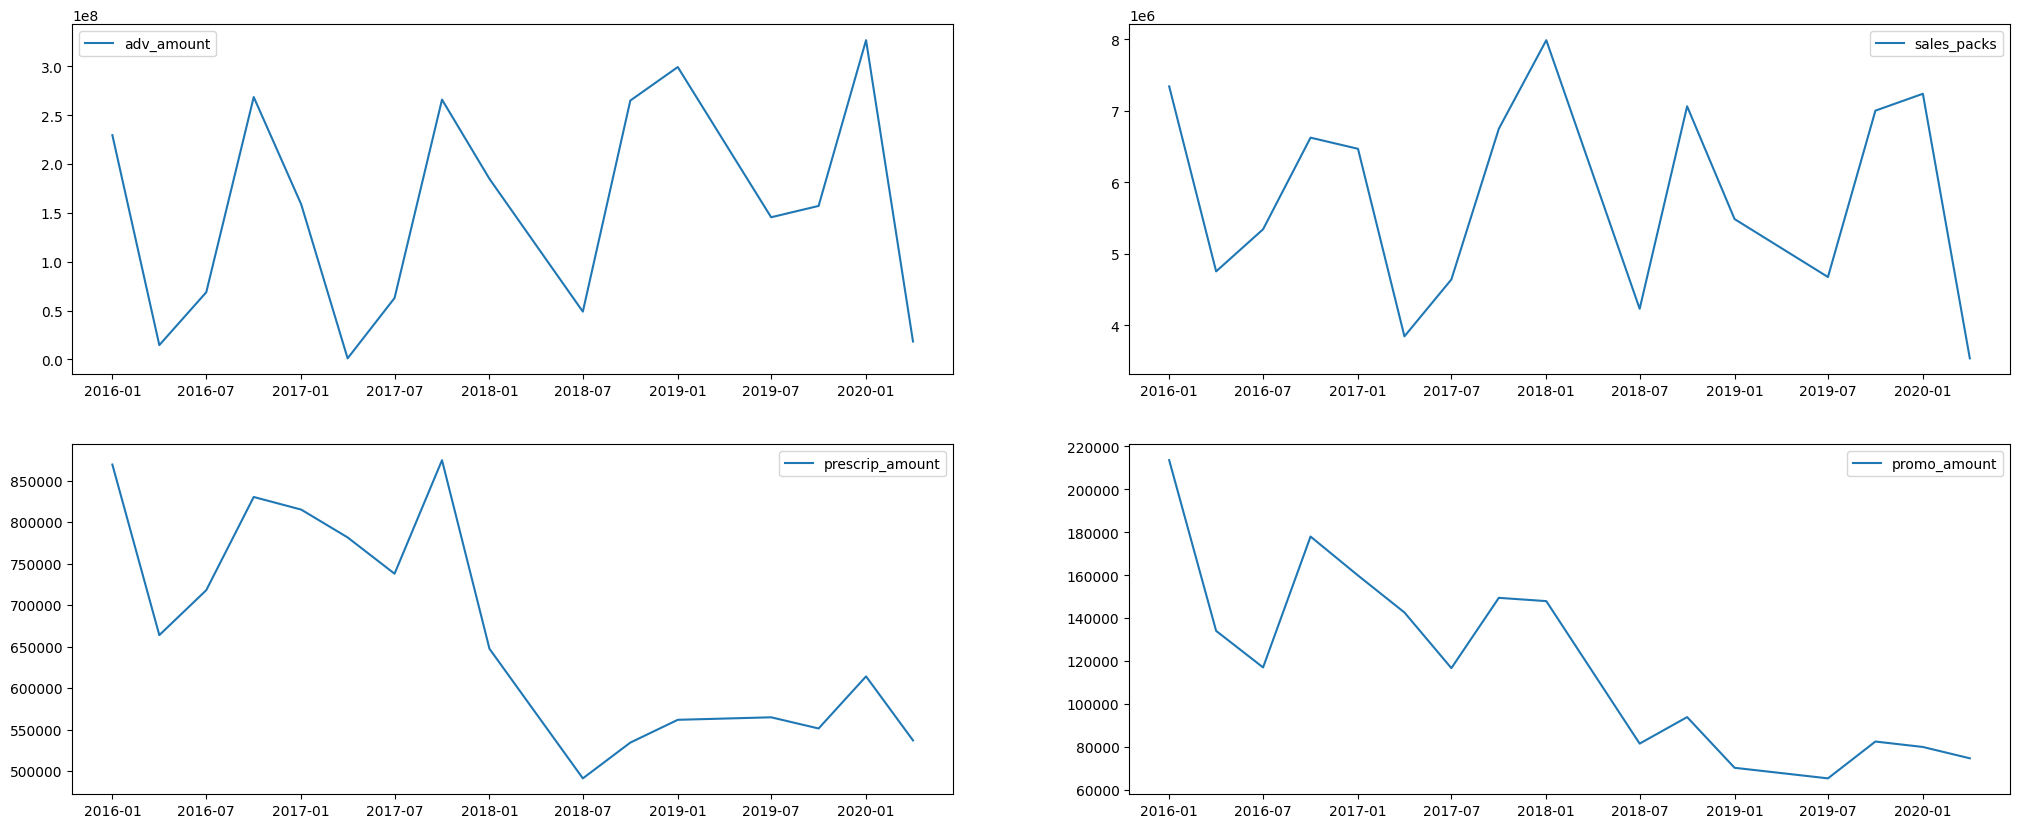

<Figure size 640x480 with 0 Axes>

In [110]:
# смотрим на динамику метрик

x = data_gomeopath_grp['date_2']
y1 = data_gomeopath_grp['adv_amount']
y2 = data_gomeopath_grp['sales_packs']
y3 = data_gomeopath_grp['prescrip_amount']
y4 = data_gomeopath_grp['promo_amount']

plt.figure(figsize=(25, 10))

plt.subplot (2, 2, 1)
plt.plot(x, y1, label="adv_amount")
plt.legend()

plt.subplot (2, 2, 2)
plt.plot(x, y2, label="sales_packs")
plt.legend()

plt.subplot (2, 2, 3)
plt.plot(x, y3, label="prescrip_amount")
plt.legend()

plt.subplot (2, 2, 4)
plt.plot(x, y4, label="promo_amount")
plt.legend()

plt.show()
plt.savefig('динамика по категории "ГОМЕОПАТИЧЕСКИЕ И ПРИРОДНЫЕ СРЕДСТВА" из 9-ти брендов')

Основные выводы:
1. Продажи и реклама имеют явновыраженную сезонность и постоянный тренд
2. Промо-активность имеет падающий тренд и заметно снизилась к концу анализируемого периода в сравнении с начальным периодом (примерно в три раза)

Попробуем спрогнозировать динамику продаж по данной группе классическим ML

In [249]:
X_train, X_test, y_train, y_test = prepareData(data_gomeopath_grp['sales_packs'], lag_start=1, lag_end=3, test_size=0.4)

In [250]:
X_train

,lag_1,lag_2
0,4753450.0,7341054.0
1,5342340.0,4753450.0
2,6624198.0,5342340.0
3,6468099.0,6624198.0
4,3844788.0,6468099.0
5,4640426.0,3844788.0
6,6748648.0,4640426.0
7,7987501.0,6748648.0
8,4230002.0,7987501.0
9,7062892.0,4230002.0


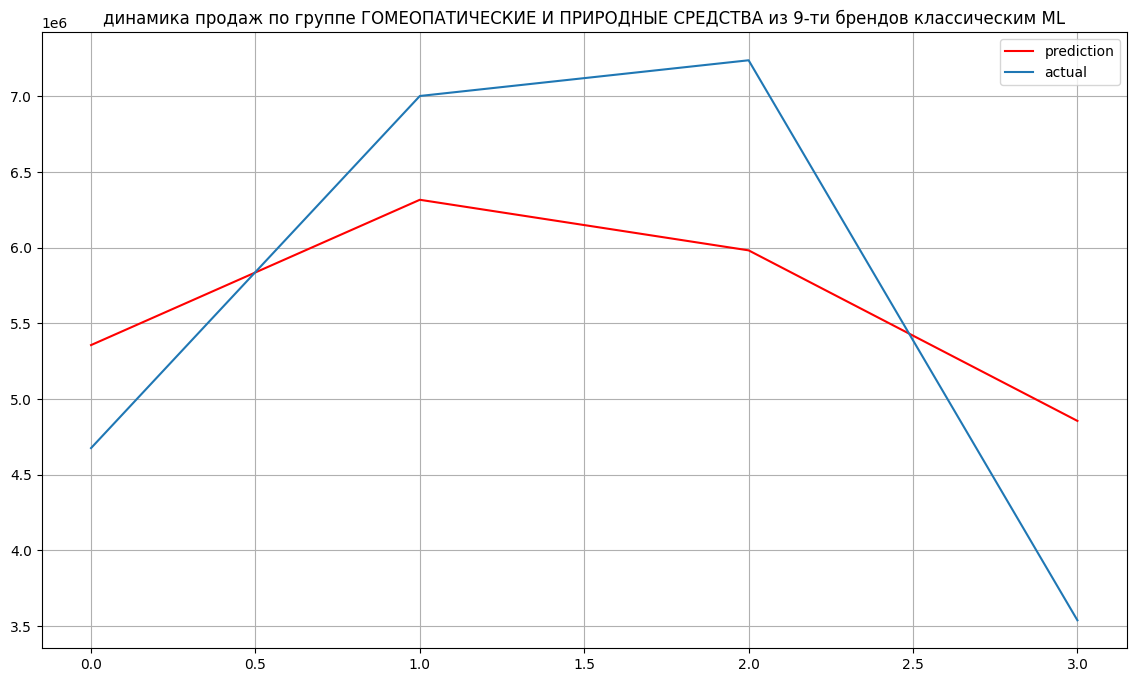

In [252]:
# Строим модель линеной регресии и график предсказания
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

plt.figure(figsize=(14, 8))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("динамика продаж по группе ГОМЕОПАТИЧЕСКИЕ И ПРИРОДНЫЕ СРЕДСТВА из 9-ти брендов классическим ML")
plt.grid(True);
plt.savefig('динамика продаж по группе классическим ML')
plt.show()

In [253]:
# оценим качество модели
print(f"MAE: {mean_absolute_error(y_test, prediction)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")
print(f"MSE: {mean_squared_error(y_test, prediction)}")
print(f"R2: {r2_score(y_test, prediction)}")
print(f"Explained variance score: {explained_variance_score(y_test, prediction)}")
print(f"Median absolute error: {median_absolute_error(y_test, prediction)}")

MAE: 985236.5344927991
MAPE: 0.19745044873405154
MSE: 1062267744424.1594
R2: 0.5646769902186021
Explained variance score: 0.5647582960526536
Median absolute error: 971151.0418786467


Получился наиболее удачный прогноз

## Основные выводы по работе:
1. Проанализирован рынок лекарственных препаратов в целом и отдельно по рецептурным и безрецептурным ЛС;
2. Отдельно пранализирована группа "ГОМЕОПАТИЧЕСКИЕ И ПРИРОДНЫЕ СРЕДСТВА" из 9-ти брендов;
3. Построены модели линейной регресси по по рынку в целом и отдельно по группам рецептурных, безрецептурных и по группе "ГОМЕОПАТИЧЕСКИЕ И ПРИРОДНЫЕ СРЕДСТВА" из 9-ти брендов;
4. Из-за небольшого объема данных ошибка модели линейной регрессии получилась довольно большой, но при наличии достаточного количества данных модель может быть использована в дальнейшем;
5. Наиболее точный прогноз получился по группе "ГОМЕОПАТИЧЕСКИЕ И ПРИРОДНЫЕ СРЕДСТВА" из 9-ти брендов.